In [ ]:
"""This tutorial shows how to train an MATD3 agent on the simple speaker listener multi-particle environment.

Authors: Michael (https://github.com/mikepratt1), Nickua (https://github.com/nicku-a)
"""

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from pettingzoo.mpe import simple_speaker_listener_v4
from mpe2 import simple_speaker_listener_v4

from agilerl.algorithms import MATD3
from agilerl.algorithms.core.registry import HyperparameterConfig, RLParameter
from agilerl.components.multi_agent_replay_buffer import MultiAgentReplayBuffer
from agilerl.hpo.mutation import Mutations
from agilerl.hpo.tournament import TournamentSelection
from agilerl.utils.utils import (
    create_population,
    default_progress_bar,
    make_multi_agent_vect_envs,
)

import random

/tmp/ipykernel_1456/2775647313.py:11: DeprecationWarning: The environment `pettingzoo.mpe` has been moved to `mpe2` and will be removed in a future release.Please update your imports.
  from pettingzoo.mpe import simple_speaker_listener_v4


[2025-11-28 00:55:52,162] [WARNING] [real_accelerator.py:209:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.


/home/franc/miniconda3/envs/projeto_rl/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


INFO 11-28 00:55:58 [__init__.py:239] No platform detected, vLLM is running on UnspecifiedPlatform
WARNING 11-28 00:56:01 [_custom_ops.py:20] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


===== AgileRL Online Multi-Agent Demo =====
Training...


🚀 Training Progress │   0% │                      │ 10000/2000000 steps │ ⏱️ 01:23 │ ⏳ 4:45:57 │ 115.99step/s 

--- Global steps 40000 ---
Steps [10000, 10000, 10000, 10000]
Scores: [-89.48858748692717, -164.72673477203418, -128.5897965014619, -78.9979592883546]
Fitnesses: ['-179.84', '-252.34', '-190.56', '-73.74']
5 fitness avgs: ['-179.84', '-252.34', '-190.56', '-73.74']
Mutations: [None, None, None, None]


🚀 Training Progress │   1% │ ▏                    │ 20000/2000000 steps │ ⏱️ 02:45 │ ⏳ 4:26:29 │ 123.83step/s 

--- Global steps 80000 ---
Steps [20000, 20000, 20000, 20000]
Scores: [-67.12307946559618, -63.54614180950679, -318.5541820379686, -132.34695100471848]
Fitnesses: ['-75.15', '-44.70', '-416.42', '-173.38']
5 fitness avgs: ['-74.44', '-59.22', '-298.13', '-123.56']
Mutations: ['None', 'lr_actor', 'None', 'lr_actor']


🚀 Training Progress │   2% │ ▎                    │ 30000/2000000 steps │ ⏱️ 04:25 │ ⏳ 5:20:37 │ 102.41step/s 

--- Global steps 120000 ---
Steps [30000, 30000, 30000, 30000]
Scores: [-71.11468521502655, -67.76949006723977, -93.6755820814558, -77.58146477133887]
Fitnesses: ['-79.06', '-56.68', '-54.74', '-62.12']
5 fitness avgs: ['-65.83', '-58.37', '-67.87', '-60.18']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │   2% │ ▍                    │ 40000/2000000 steps │ ⏱️ 06:05 │ ⏳ 5:15:33 │ 103.52step/s 

--- Global steps 160000 ---
Steps [40000, 40000, 40000, 40000]
Scores: [-58.493197413096986, -74.92131053701401, -66.20191260396543, -72.7500031065328]
Fitnesses: ['-65.29', '-89.81', '-80.39', '-72.53']
5 fitness avgs: ['-60.10', '-67.59', '-63.88', '-61.91']
Mutations: ['None', 'learn_step', 'None', 'encoder.remove_node']


🚀 Training Progress │   2% │ ▌                    │ 50000/2000000 steps │ ⏱️ 07:29 │ ⏳ 4:40:00 │ 116.06step/s 

--- Global steps 200000 ---
Steps [50000, 50000, 50000, 50000]
Scores: [-74.80652442721042, -57.809239211537786, -60.60112789273926, -75.27058833110341]
Fitnesses: ['-62.96', '-51.31', '-45.98', '-77.48']
5 fitness avgs: ['-60.67', '-58.34', '-60.30', '-63.58']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │   3% │ ▌                    │ 60000/2000000 steps │ ⏱️ 08:55 │ ⏳ 4:30:15 │ 119.64step/s 

--- Global steps 240000 ---
Steps [60000, 60000, 60000, 60000]
Scores: [-90.76479093304603, -49.1790294341064, -44.641070358297554, -48.82294576663606]
Fitnesses: ['-116.08', '-43.97', '-50.28', '-37.36']
5 fitness avgs: ['-66.81', '-54.72', '-55.60', '-51.07']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │   4% │ ▋                    │ 70000/2000000 steps │ ⏱️ 10:21 │ ⏳ 4:28:48 │ 119.66step/s 

--- Global steps 280000 ---
Steps [70000, 70000, 70000, 70000]
Scores: [-46.47464425593265, -46.34550655333212, -46.432729623440345, -50.05721397917257]
Fitnesses: ['-48.99', '-48.69', '-42.39', '-33.41']
5 fitness avgs: ['-51.93', '-56.40', '-50.61', '-52.46']
Mutations: ['None', 'None', 'None', 'batch_size']


🚀 Training Progress │   4% │ ▊                    │ 80000/2000000 steps │ ⏱️ 11:46 │ ⏳ 4:26:55 │ 119.88step/s 

--- Global steps 320000 ---
Steps [80000, 80000, 80000, 80000]
Scores: [-55.766707635462396, -58.21636220465889, -46.583274395497895, -90.7824549013848]
Fitnesses: ['-91.85', '-72.14', '-45.46', '-66.52']
5 fitness avgs: ['-57.64', '-53.70', '-48.36', '-58.37']
Mutations: ['None', 'param', 'None', 'remove_latent_node']


🚀 Training Progress │   4% │ ▉                    │ 90000/2000000 steps │ ⏱️ 13:18 │ ⏳ 4:41:29 │ 113.09step/s 

--- Global steps 360000 ---
Steps [90000, 90000, 90000, 90000]
Scores: [-44.68295357664163, -50.93868904108473, -53.151845393381976, -46.230476553239754]
Fitnesses: ['-53.55', '-51.66', '-51.68', '-58.68']
5 fitness avgs: ['-46.02', '-50.97', '-50.98', '-47.04']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │   5% │ █                    │ 100000/2000000 steps │ ⏱️ 15:04 │ ⏳ 5:37:38 │ 93.79step/s 

--- Global steps 400000 ---
Steps [100000, 100000, 100000, 100000]
Scores: [-48.828029566781225, -47.9136828911871, -50.18273980338692, -46.5688311117109]
Fitnesses: ['-43.50', '-50.01', '-53.70', '-47.20']
5 fitness avgs: ['-44.45', '-45.75', '-46.49', '-45.19']
Mutations: ['None', 'lr_critic', 'None', 'None']


🚀 Training Progress │   6% │ █                    │ 110000/2000000 steps │ ⏱️ 16:35 │ ⏳ 4:52:14 │ 107.79step/s 

--- Global steps 440000 ---
Steps [110000, 110000, 110000, 110000]
Scores: [-42.84377700557022, -45.99746340519545, -155.95797394588146, -51.63428250268806]
Fitnesses: ['-36.51', '-40.74', '-141.42', '-55.58']
5 fitness avgs: ['-44.28', '-45.87', '-66.01', '-48.10']
Mutations: ['None', 'learn_step', 'add_latent_node', 'None']


🚀 Training Progress │   6% │ █▏                   │ 120000/2000000 steps │ ⏱️ 18:07 │ ⏳ 4:43:57 │ 110.34step/s 

--- Global steps 480000 ---
Steps [120000, 120000, 120000, 120000]
Scores: [-38.635301658473644, -51.352407067046606, -42.35352096340464, -41.672965355402404]
Fitnesses: ['-38.82', '-37.52', '-39.41', '-42.69']
5 fitness avgs: ['-43.57', '-47.12', '-47.50', '-45.93']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │   6% │ █▎                   │ 130000/2000000 steps │ ⏱️ 19:38 │ ⏳ 4:38:18 │ 111.99step/s 

--- Global steps 520000 ---
Steps [130000, 130000, 130000, 130000]
Scores: [-40.14472442075557, -40.18268653190773, -38.79819832048889, -40.99492652003434]
Fitnesses: ['-42.98', '-32.89', '-34.85', '-35.55']
5 fitness avgs: ['-43.07', '-43.41', '-41.45', '-43.95']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │   7% │ █▍                   │ 140000/2000000 steps │ ⏱️ 21:10 │ ⏳ 4:35:34 │ 112.49step/s 

--- Global steps 560000 ---
Steps [140000, 140000, 140000, 140000]
Scores: [-38.90459096881029, -41.63395467582144, -44.46403943879594, -40.706178300190125]
Fitnesses: ['-41.14', '-46.69', '-53.42', '-44.01']
5 fitness avgs: ['-38.96', '-40.07', '-43.05', '-41.51']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │   8% │ █▌                   │ 150000/2000000 steps │ ⏱️ 22:39 │ ⏳ 4:30:10 │ 114.13step/s 

--- Global steps 600000 ---
Steps [150000, 150000, 150000, 150000]
Scores: [-54.22407404124007, -42.03461159855877, -45.759788946781256, -42.28042235039369]
Fitnesses: ['-50.62', '-44.96', '-39.23', '-33.80']
5 fitness avgs: ['-40.39', '-40.36', '-38.11', '-37.02']
Mutations: ['head_net.add_node', 'None', 'None', 'None']


🚀 Training Progress │   8% │ █▌                   │ 160000/2000000 steps │ ⏱️ 24:06 │ ⏳ 4:21:33 │ 117.24step/s 

--- Global steps 640000 ---
Steps [160000, 160000, 160000, 160000]
Scores: [-38.6398436402261, -38.39306578315031, -39.281550885855786, -37.90873717920195]
Fitnesses: ['-49.74', '-35.58', '-40.30', '-32.25']
5 fitness avgs: ['-39.67', '-36.84', '-37.78', '-37.26']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │   8% │ █▋                   │ 170000/2000000 steps │ ⏱️ 25:34 │ ⏳ 4:20:57 │ 116.88step/s 

--- Global steps 680000 ---
Steps [170000, 170000, 170000, 170000]
Scores: [-40.47040906562299, -47.29398015872235, -38.61744674090238, -43.33334389277545]
Fitnesses: ['-40.25', '-48.19', '-42.90', '-44.05']
5 fitness avgs: ['-37.12', '-39.66', '-37.66', '-38.31']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │   9% │ █▊                   │ 180000/2000000 steps │ ⏱️ 27:02 │ ⏳ 4:16:26 │ 118.29step/s 

--- Global steps 720000 ---
Steps [180000, 180000, 180000, 180000]
Scores: [-39.08880066432264, -39.11276938130304, -42.35069204382006, -42.252105837456654]
Fitnesses: ['-37.55', '-45.71', '-37.92', '-43.22']
5 fitness avgs: ['-37.66', '-40.48', '-37.74', '-41.33']
Mutations: ['batch_size', 'None', 'param', 'None']


🚀 Training Progress │  10% │ █▉                   │ 190000/2000000 steps │ ⏱️ 28:33 │ ⏳ 4:22:17 │ 115.01step/s 

--- Global steps 760000 ---
Steps [190000, 190000, 190000, 190000]
Scores: [-39.4791118674618, -78.60661517377632, -41.24034456497729, -39.14362568929808]
Fitnesses: ['-48.04', '-107.46', '-40.43', '-40.03']
5 fitness avgs: ['-39.04', '-51.00', '-37.52', '-37.51']
Mutations: ['None', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  10% │ ██                   │ 200000/2000000 steps │ ⏱️ 30:02 │ ⏳ 4:20:35 │ 115.12step/s 

--- Global steps 800000 ---
Steps [200000, 200000, 200000, 200000]
Scores: [-36.64611223494601, -35.951722300652406, -35.56873649736455, -32.30422880748167]
Fitnesses: ['-27.87', '-44.70', '-34.35', '-39.14']
5 fitness avgs: ['-36.33', '-39.69', '-37.62', '-38.58']
Mutations: ['None', 'param', 'None', 'lr_critic']


🚀 Training Progress │  10% │ ██                   │ 210000/2000000 steps │ ⏱️ 31:26 │ ⏳ 4:08:35 │ 120.01step/s 

--- Global steps 840000 ---
Steps [210000, 210000, 210000, 210000]
Scores: [-35.08752907374887, -37.12472931106705, -33.56674758035333, -33.61108080375637]
Fitnesses: ['-36.06', '-32.49', '-39.21', '-39.69']
5 fitness avgs: ['-36.43', '-35.71', '-38.35', '-37.15']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  11% │ ██▏                  │ 220000/2000000 steps │ ⏱️ 32:49 │ ⏳ 3:57:57 │ 124.67step/s 

--- Global steps 880000 ---
Steps [220000, 220000, 220000, 220000]
Scores: [-39.871981565613275, -34.62917940714656, -38.00180878822873, -37.41902254264483]
Fitnesses: ['-34.98', '-37.42', '-33.49', '-37.07']
5 fitness avgs: ['-34.66', '-35.86', '-34.36', '-35.07']
Mutations: ['param', 'learn_step', 'head_net.remove_node', 'None']


🚀 Training Progress │  12% │ ██▎                  │ 230000/2000000 steps │ ⏱️ 34:18 │ ⏳ 4:11:55 │ 117.09step/s 

--- Global steps 920000 ---
Steps [230000, 230000, 230000, 230000]
Scores: [-32.72686011891697, -36.78297888210139, -39.71856853054796, -36.269157304206466]
Fitnesses: ['-31.15', '-35.70', '-41.98', '-38.01']
5 fitness avgs: ['-33.00', '-34.21', '-35.47', '-34.38']
Mutations: ['None', 'head_net.remove_node', 'None', 'None']


🚀 Training Progress │  12% │ ██▍                  │ 240000/2000000 steps │ ⏱️ 35:48 │ ⏳ 4:13:47 │ 115.58step/s 

--- Global steps 960000 ---
Steps [240000, 240000, 240000, 240000]
Scores: [-34.76503442371377, -34.00024077644234, -39.19432729745891, -37.80902594333778]
Fitnesses: ['-33.89', '-41.78', '-33.70', '-27.75']
5 fitness avgs: ['-31.78', '-33.36', '-34.21', '-30.55']
Mutations: ['None', 'head_net.remove_node', 'None', 'None']


🚀 Training Progress │  12% │ ██▌                  │ 250000/2000000 steps │ ⏱️ 37:16 │ ⏳ 4:06:47 │ 118.19step/s 

--- Global steps 1000000 ---
Steps [250000, 250000, 250000, 250000]
Scores: [-32.395695755417165, -31.18571250656947, -34.712504179671086, -31.912687516394996]
Fitnesses: ['-27.84', '-32.40', '-33.16', '-36.41']
5 fitness avgs: ['-30.54', '-31.45', '-31.61', '-32.26']
Mutations: ['param', 'None', 'param', 'param']


🚀 Training Progress │  13% │ ██▌                  │ 260000/2000000 steps │ ⏱️ 38:46 │ ⏳ 4:11:43 │ 115.20step/s 

--- Global steps 1040000 ---
Steps [260000, 260000, 260000, 260000]
Scores: [-32.68267047291723, -30.358253936847888, -30.29031412155418, -33.70942296862197]
Fitnesses: ['-42.55', '-28.73', '-28.54', '-33.73']
5 fitness avgs: ['-32.56', '-29.79', '-29.75', '-30.79']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  14% │ ██▋                  │ 270000/2000000 steps │ ⏱️ 40:14 │ ⏳ 4:03:14 │ 118.54step/s 

--- Global steps 1080000 ---
Steps [270000, 270000, 270000, 270000]
Scores: [-29.31647128989571, -28.483468055669718, -28.90971175614303, -26.143592267591377]
Fitnesses: ['-25.53', '-29.91', '-25.01', '-27.08']
5 fitness avgs: ['-28.16', '-29.08', '-28.10', '-31.27']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  14% │ ██▊                  │ 280000/2000000 steps │ ⏱️ 41:46 │ ⏳ 4:11:41 │ 113.90step/s 

--- Global steps 1120000 ---
Steps [280000, 280000, 280000, 280000]
Scores: [-29.013156509716406, -28.023651087448734, -31.481163664309587, -27.16615637403009]
Fitnesses: ['-25.21', '-28.91', '-22.35', '-37.70']
5 fitness avgs: ['-26.91', '-27.65', '-26.34', '-29.47']
Mutations: ['None', 'None', 'param', 'batch_size']


🚀 Training Progress │  14% │ ██▉                  │ 290000/2000000 steps │ ⏱️ 43:19 │ ⏳ 4:12:49 │ 112.73step/s 

--- Global steps 1160000 ---
Steps [290000, 290000, 290000, 290000]
Scores: [-28.663150722782298, -28.638564913155815, -28.610056187068913, -28.019334740600407]
Fitnesses: ['-28.61', '-23.68', '-33.23', '-27.23']
5 fitness avgs: ['-26.51', '-26.84', '-28.00', '-26.23']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  15% │ ███                  │ 300000/2000000 steps │ ⏱️ 44:48 │ ⏳ 4:03:21 │ 116.42step/s 

--- Global steps 1200000 ---
Steps [300000, 300000, 300000, 300000]
Scores: [-26.019078798220324, -27.73278230320896, -27.905865687952236, -26.582966241826526]
Fitnesses: ['-26.95', '-25.94', '-31.13', '-25.63']
5 fitness avgs: ['-26.05', '-26.13', '-27.17', '-26.07']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  16% │ ███                  │ 310000/2000000 steps │ ⏱️ 46:20 │ ⏳ 4:06:24 │ 114.31step/s 

--- Global steps 1240000 ---
Steps [310000, 310000, 310000, 310000]
Scores: [-54.7887671671245, -25.219968244309843, -24.763761798393435, -27.900843926129173]
Fitnesses: ['-32.87', '-20.86', '-26.76', '-31.30']
5 fitness avgs: ['-26.88', '-24.48', '-25.67', '-26.64']
Mutations: ['encoder.remove_node', 'None', 'None', 'None']


🚀 Training Progress │  16% │ ███▏                 │ 320000/2000000 steps │ ⏱️ 47:51 │ ⏳ 4:04:04 │ 114.72step/s 

--- Global steps 1280000 ---
Steps [320000, 320000, 320000, 320000]
Scores: [-35.176588528095635, -46.08270782204192, -25.487459765649128, -27.067328425993598]
Fitnesses: ['-31.29', '-63.88', '-26.26', '-24.65']
5 fitness avgs: ['-25.74', '-34.66', '-25.92', '-25.60']
Mutations: ['encoder.add_node', 'None', 'lr_actor', 'None']


🚀 Training Progress │  16% │ ███▎                 │ 330000/2000000 steps │ ⏱️ 49:21 │ ⏳ 3:57:40 │ 117.11step/s 

--- Global steps 1320000 ---
Steps [330000, 330000, 330000, 330000]
Scores: [-33.704761246508866, -28.458349030963564, -26.285869758711716, -25.819361986412943]
Fitnesses: ['-26.82', '-34.24', '-26.09', '-26.79']
5 fitness avgs: ['-26.49', '-28.11', '-26.67', '-26.81']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  17% │ ███▍                 │ 340000/2000000 steps │ ⏱️ 50:51 │ ⏳ 3:58:45 │ 115.87step/s 

--- Global steps 1360000 ---
Steps [340000, 340000, 340000, 340000]
Scores: [-62.58836946000582, -27.740518896285565, -26.87818929362403, -27.710353123268707]
Fitnesses: ['-109.50', '-28.36', '-35.33', '-24.67']
5 fitness avgs: ['-42.67', '-26.76', '-27.84', '-26.02']
Mutations: ['remove_latent_node', 'None', 'None', 'param']


🚀 Training Progress │  18% │ ███▌                 │ 350000/2000000 steps │ ⏱️ 52:22 │ ⏳ 3:59:16 │ 114.93step/s 

--- Global steps 1400000 ---
Steps [350000, 350000, 350000, 350000]
Scores: [-29.50422292040413, -31.47631929856959, -27.100815453604536, -26.5539198588785]
Fitnesses: ['-26.18', '-28.08', '-30.55', '-33.69']
5 fitness avgs: ['-26.13', '-27.25', '-28.82', '-29.45']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  18% │ ███▌                 │ 360000/2000000 steps │ ⏱️ 53:49 │ ⏳ 3:50:21 │ 118.66step/s 

--- Global steps 1440000 ---
Steps [360000, 360000, 360000, 360000]
Scores: [-29.421263787101886, -28.149037334771837, -25.915981573415994, -41.3969724193637]
Fitnesses: ['-30.85', '-32.07', '-27.50', '-22.69']
5 fitness avgs: ['-26.95', '-28.31', '-27.40', '-26.44']
Mutations: ['head_net.remove_node', 'None', 'lr_critic', 'param']


🚀 Training Progress │  18% │ ███▋                 │ 370000/2000000 steps │ ⏱️ 55:20 │ ⏳ 3:54:04 │ 116.06step/s 

--- Global steps 1480000 ---
Steps [370000, 370000, 370000, 370000]
Scores: [-26.69537829979139, -26.72939892124344, -27.00200509446826, -30.640254462715202]
Fitnesses: ['-28.74', '-29.70', '-27.56', '-28.85']
5 fitness avgs: ['-26.93', '-27.64', '-26.70', '-27.47']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  19% │ ███▊                 │ 380000/2000000 steps │ ⏱️ 56:52 │ ⏳ 3:51:41 │ 116.54step/s 

--- Global steps 1520000 ---
Steps [380000, 380000, 380000, 380000]
Scores: [-29.11117215939255, -28.27360784639469, -32.402120197896146, -63.18762313898649]
Fitnesses: ['-32.24', '-25.02', '-29.56', '-48.21']
5 fitness avgs: ['-27.79', '-27.29', '-27.49', '-31.75']
Mutations: ['None', 'param', 'param', 'remove_latent_node']


🚀 Training Progress │  20% │ ███▉                 │ 390000/2000000 steps │ ⏱️ 58:24 │ ⏳ 3:55:00 │ 114.18step/s 

--- Global steps 1560000 ---
Steps [390000, 390000, 390000, 390000]
Scores: [-29.56425433570782, -30.370705105124227, -27.53199102690797, -27.536717902024765]
Fitnesses: ['-31.27', '-25.83', '-25.36', '-26.56']
5 fitness avgs: ['-28.60', '-27.52', '-27.42', '-27.43']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  20% │ ████                 │ 400000/2000000 steps │ ⏱️ 59:57 │ ⏳ 3:56:29 │ 112.76step/s 

--- Global steps 1600000 ---
Steps [400000, 400000, 400000, 400000]
Scores: [-25.715272924598718, -24.959748595935483, -24.53601717100342, -29.087612029903347]
Fitnesses: ['-20.48', '-24.80', '-25.97', '-24.94']
5 fitness avgs: ['-26.28', '-27.15', '-27.47', '-26.80']
Mutations: ['None', 'lr_critic', 'None', 'None']


🚀 Training Progress │  20% │ ████                 │ 410000/2000000 steps │ ⏱️ 1:01:34 │ ⏳ 4:04:41 │ 108.30step/s 

--- Global steps 1640000 ---
Steps [410000, 410000, 410000, 410000]
Scores: [-26.621389809650573, -25.434107219107837, -24.60982775625319, -28.188717302499803]
Fitnesses: ['-28.83', '-32.41', '-28.80', '-25.95']
5 fitness avgs: ['-25.88', '-26.60', '-26.74', '-27.45']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  21% │ ████▏                │ 420000/2000000 steps │ ⏱️ 1:03:08 │ ⏳ 3:52:24 │ 113.30step/s 

--- Global steps 1680000 ---
Steps [420000, 420000, 420000, 420000]
Scores: [-27.520112339717915, -28.15776467407818, -24.773324322985932, -43.74403175682862]
Fitnesses: ['-26.52', '-26.07', '-29.98', '-37.52']
5 fitness avgs: ['-25.24', '-25.15', '-25.94', '-27.44']
Mutations: ['None', 'None', 'learn_step', 'param']


🚀 Training Progress │  22% │ ████▎                │ 430000/2000000 steps │ ⏱️ 1:04:37 │ ⏳ 3:45:42 │ 115.93step/s 

--- Global steps 1720000 ---
Steps [430000, 430000, 430000, 430000]
Scores: [-28.59903601949911, -28.95703168218248, -36.80222925955566, -26.557864514285487]
Fitnesses: ['-30.09', '-24.11', '-21.67', '-34.15']
5 fitness avgs: ['-26.17', '-24.97', '-24.48', '-26.98']
Mutations: ['None', 'None', 'head_net.add_node', 'None']


🚀 Training Progress │  22% │ ████▍                │ 440000/2000000 steps │ ⏱️ 1:06:07 │ ⏳ 3:43:04 │ 116.56step/s 

--- Global steps 1760000 ---
Steps [440000, 440000, 440000, 440000]
Scores: [-31.681772110199805, -30.183012716221285, -29.011355958708872, -29.238596198383657]
Fitnesses: ['-32.00', '-33.59', '-29.12', '-29.13']
5 fitness avgs: ['-25.81', '-26.13', '-25.72', '-26.92']
Mutations: ['None', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  22% │ ████▌                │ 450000/2000000 steps │ ⏱️ 1:07:37 │ ⏳ 3:38:44 │ 118.10step/s 

--- Global steps 1800000 ---
Steps [450000, 450000, 450000, 450000]
Scores: [-30.373838817317527, -34.48179297329855, -35.07020385211438, -30.2294971023989]
Fitnesses: ['-29.32', '-33.62', '-36.02', '-31.59']
5 fitness avgs: ['-27.49', '-28.35', '-28.92', '-27.94']
Mutations: ['None', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  23% │ ████▌                │ 460000/2000000 steps │ ⏱️ 1:09:06 │ ⏳ 3:36:43 │ 118.43step/s 

--- Global steps 1840000 ---
Steps [460000, 460000, 460000, 460000]
Scores: [-28.13884342584196, -27.303054315667914, -27.983706608511937, -29.01184244194449]
Fitnesses: ['-30.48', '-31.53', '-29.39', '-28.27']
5 fitness avgs: ['-27.82', '-28.03', '-28.06', '-27.83']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  24% │ ████▋                │ 470000/2000000 steps │ ⏱️ 1:10:36 │ ⏳ 3:37:59 │ 116.98step/s 

--- Global steps 1880000 ---
Steps [470000, 470000, 470000, 470000]
Scores: [-27.26312716008956, -28.32584254017075, -32.32128463077222, -60.94332519929445]
Fitnesses: ['-26.21', '-34.95', '-27.75', '-88.08']
5 fitness avgs: ['-27.85', '-29.81', '-28.37', '-40.22']
Mutations: ['None', 'head_net.remove_node', 'param', 'remove_latent_node']


🚀 Training Progress │  24% │ ████▊                │ 480000/2000000 steps │ ⏱️ 1:12:15 │ ⏳ 3:42:56 │ 113.63step/s 

--- Global steps 1920000 ---
Steps [480000, 480000, 480000, 480000]
Scores: [-27.925971138995745, -29.092845996077973, -26.508691826860947, -28.538944384921106]
Fitnesses: ['-32.36', '-32.21', '-31.51', '-29.00']
5 fitness avgs: ['-29.50', '-29.47', '-29.33', '-28.82']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  24% │ ████▉                │ 490000/2000000 steps │ ⏱️ 1:13:48 │ ⏳ 3:44:24 │ 112.15step/s 

--- Global steps 1960000 ---
Steps [490000, 490000, 490000, 490000]
Scores: [-31.618101593604987, -28.516672603392404, -34.401320256733825, -27.584290925253605]
Fitnesses: ['-35.66', '-31.26', '-30.78', '-28.71']
5 fitness avgs: ['-30.13', '-29.25', '-29.66', '-29.25']
Mutations: ['None', 'None', 'head_net.add_node', 'None']


🚀 Training Progress │  25% │ █████                │ 500000/2000000 steps │ ⏱️ 1:15:23 │ ⏳ 3:43:35 │ 111.81step/s 

--- Global steps 2000000 ---
Steps [500000, 500000, 500000, 500000]
Scores: [-28.835727483572754, -28.575272800421637, -29.25434670878361, -27.507288659470564]
Fitnesses: ['-24.25', '-33.56', '-24.52', '-32.34']
5 fitness avgs: ['-28.23', '-30.10', '-29.17', '-29.86']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  26% │ █████                │ 510000/2000000 steps │ ⏱️ 1:17:00 │ ⏳ 3:47:29 │ 109.16step/s 

--- Global steps 2040000 ---
Steps [510000, 510000, 510000, 510000]
Scores: [-32.60433019244147, -28.852461140061976, -29.911218480196613, -36.85066795168851]
Fitnesses: ['-32.19', '-36.12', '-28.66', '-32.30']
5 fitness avgs: ['-28.58', '-30.30', '-27.87', '-28.60']
Mutations: ['None', 'None', 'None', 'head_net.add_node']


🚀 Training Progress │  26% │ █████▏               │ 520000/2000000 steps │ ⏱️ 1:18:35 │ ⏳ 3:43:29 │ 110.37step/s 

--- Global steps 2080000 ---
Steps [520000, 520000, 520000, 520000]
Scores: [-29.53124378107363, -31.62684896866576, -34.93154933048414, -29.997031328623496]
Fitnesses: ['-28.23', '-30.16', '-34.18', '-33.24']
5 fitness avgs: ['-28.27', '-29.37', '-29.46', '-29.98']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  26% │ █████▎               │ 530000/2000000 steps │ ⏱️ 1:20:09 │ ⏳ 3:38:58 │ 111.88step/s 

--- Global steps 2120000 ---
Steps [530000, 530000, 530000, 530000]
Scores: [-29.03862591893867, -43.10655669463013, -31.57786919968493, -31.69204617958417]
Fitnesses: ['-37.51', '-30.76', '-27.31', '-32.44']
5 fitness avgs: ['-29.47', '-29.31', '-28.62', '-30.17']
Mutations: ['lr_actor', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  27% │ █████▍               │ 540000/2000000 steps │ ⏱️ 1:21:45 │ ⏳ 3:40:11 │ 110.51step/s 

--- Global steps 2160000 ---
Steps [540000, 540000, 540000, 540000]
Scores: [-67.57476763066708, -31.670957641139577, -30.503584526642754, -38.141503017126844]
Fitnesses: ['-37.94', '-31.98', '-35.56', '-39.39']
5 fitness avgs: ['-30.47', '-29.28', '-29.99', '-31.45']
Mutations: ['param', 'None', 'None', 'lr_actor']


🚀 Training Progress │  28% │ █████▌               │ 550000/2000000 steps │ ⏱️ 1:23:21 │ ⏳ 3:39:12 │ 110.25step/s 

--- Global steps 2200000 ---
Steps [550000, 550000, 550000, 550000]
Scores: [-28.344644939999924, -31.0601986916173, -33.09550796695393, -39.17999465836406]
Fitnesses: ['-27.21', '-30.31', '-33.68', '-38.70']
5 fitness avgs: ['-29.87', '-31.20', '-32.36', '-32.88']
Mutations: ['None', 'None', 'lr_critic', 'param']


🚀 Training Progress │  28% │ █████▌               │ 560000/2000000 steps │ ⏱️ 1:24:56 │ ⏳ 3:37:38 │ 110.27step/s 

--- Global steps 2240000 ---
Steps [560000, 560000, 560000, 560000]
Scores: [-29.501783762092423, -39.38164723077988, -34.55973489458706, -32.50477605187456]
Fitnesses: ['-29.94', '-26.45', '-33.76', '-36.00']
5 fitness avgs: ['-30.12', '-29.43', '-33.90', '-31.34']
Mutations: ['None', 'param', 'None', 'param']


🚀 Training Progress │  28% │ █████▋               │ 570000/2000000 steps │ ⏱️ 1:26:35 │ ⏳ 3:42:20 │ 107.19step/s 

--- Global steps 2280000 ---
Steps [570000, 570000, 570000, 570000]
Scores: [-34.02486024974895, -34.40389809564774, -31.915118691049646, -34.534074455024545]
Fitnesses: ['-34.20', '-31.58', '-30.85', '-33.02']
5 fitness avgs: ['-29.43', '-28.91', '-30.67', '-29.19']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  29% │ █████▊               │ 580000/2000000 steps │ ⏱️ 1:28:04 │ ⏳ 3:21:57 │ 117.18step/s 

--- Global steps 2320000 ---
Steps [580000, 580000, 580000, 580000]
Scores: [-31.321032492905697, -32.471698448240225, -35.21928844956647, -32.92155712803453]
Fitnesses: ['-26.69', '-34.05', '-39.59', '-35.40']
5 fitness avgs: ['-28.78', '-30.54', '-31.36', '-31.05']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  30% │ █████▉               │ 590000/2000000 steps │ ⏱️ 1:29:35 │ ⏳ 3:23:24 │ 115.53step/s 

--- Global steps 2360000 ---
Steps [590000, 590000, 590000, 590000]
Scores: [-40.80392237104387, -35.70519271056856, -32.04639292289717, -31.116166297190556]
Fitnesses: ['-38.46', '-29.30', '-27.10', '-34.73']
5 fitness avgs: ['-30.08', '-30.83', '-27.81', '-31.09']
Mutations: ['head_net.add_node', 'None', 'None', 'None']


🚀 Training Progress │  30% │ ██████               │ 600000/2000000 steps │ ⏱️ 1:31:08 │ ⏳ 3:25:46 │ 113.39step/s 

--- Global steps 2400000 ---
Steps [600000, 600000, 600000, 600000]
Scores: [-32.46988276510359, -40.61281458799574, -40.77864482878314, -31.022007436094192]
Fitnesses: ['-32.01', '-46.86', '-51.61', '-25.90']
5 fitness avgs: ['-28.77', '-34.01', '-34.96', '-27.55']
Mutations: ['lr_actor', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  30% │ ██████               │ 610000/2000000 steps │ ⏱️ 1:32:39 │ ⏳ 3:18:17 │ 116.83step/s 

--- Global steps 2440000 ---
Steps [610000, 610000, 610000, 610000]
Scores: [-41.818391327935714, -37.016807797859386, -32.51004841159066, -41.91191063401193]
Fitnesses: ['-45.54', '-45.53', '-30.61', '-31.23']
5 fitness avgs: ['-31.36', '-31.36', '-29.60', '-35.91']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  31% │ ██████▏              │ 620000/2000000 steps │ ⏱️ 1:34:12 │ ⏳ 3:20:35 │ 114.66step/s 

--- Global steps 2480000 ---
Steps [620000, 620000, 620000, 620000]
Scores: [-28.40311164100186, -28.32708650408179, -28.195186913323088, -29.13438281886423]
Fitnesses: ['-28.33', '-27.63', '-31.65', '-29.49']
5 fitness avgs: ['-28.95', '-28.81', '-29.61', '-29.18']
Mutations: ['None', 'None', 'lr_actor', 'encoder.remove_node']


🚀 Training Progress │  32% │ ██████▎              │ 630000/2000000 steps │ ⏱️ 1:35:46 │ ⏳ 3:21:57 │ 113.06step/s 

--- Global steps 2520000 ---
Steps [630000, 630000, 630000, 630000]
Scores: [-46.299387777512294, -29.483934393915664, -29.905502726044123, -28.963098481193146]
Fitnesses: ['-29.30', '-23.15', '-27.50', '-28.01']
5 fitness avgs: ['-29.33', '-28.24', '-29.77', '-29.07']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  32% │ ██████▍              │ 640000/2000000 steps │ ⏱️ 1:37:14 │ ⏳ 3:09:50 │ 119.40step/s 

--- Global steps 2560000 ---
Steps [640000, 640000, 640000, 640000]
Scores: [-26.74972922830742, -27.905018439962696, -29.10832387241236, -29.227043614522646]
Fitnesses: ['-28.60', '-34.74', '-30.37', '-31.94']
5 fitness avgs: ['-28.54', '-30.86', '-29.73', '-30.04']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  32% │ ██████▌              │ 650000/2000000 steps │ ⏱️ 1:38:48 │ ⏳ 3:15:25 │ 115.13step/s 

--- Global steps 2600000 ---
Steps [650000, 650000, 650000, 650000]
Scores: [-27.87579510148933, -29.676465555190067, -27.879845052450083, -31.03605565900385]
Fitnesses: ['-27.43', '-31.67', '-29.83', '-36.75']
5 fitness avgs: ['-27.62', '-28.47', '-28.10', '-30.67']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  33% │ ██████▌              │ 660000/2000000 steps │ ⏱️ 1:40:26 │ ⏳ 3:22:00 │ 110.56step/s 

--- Global steps 2640000 ---
Steps [660000, 660000, 660000, 660000]
Scores: [-31.432536370403938, -29.19380893255492, -27.561098936596665, -27.11205594596315]
Fitnesses: ['-23.24', '-32.94', '-27.10', '-25.76']
5 fitness avgs: ['-26.15', '-28.09', '-27.40', '-27.50']
Mutations: ['param', 'None', 'param', 'None']


🚀 Training Progress │  34% │ ██████▋              │ 670000/2000000 steps │ ⏱️ 1:42:05 │ ⏳ 3:25:05 │ 108.08step/s 

--- Global steps 2680000 ---
Steps [670000, 670000, 670000, 670000]
Scores: [-28.179983255951047, -27.913677301276678, -41.41370795942716, -27.25208502698335]
Fitnesses: ['-26.87', '-30.08', '-24.28', '-23.36']
5 fitness avgs: ['-25.86', '-26.50', '-25.34', '-25.15']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  34% │ ██████▊              │ 680000/2000000 steps │ ⏱️ 1:43:40 │ ⏳ 3:17:09 │ 111.59step/s 

--- Global steps 2720000 ---
Steps [680000, 680000, 680000, 680000]
Scores: [-29.007159058788684, -30.328144423973914, -27.697339934104107, -27.700959659296913]
Fitnesses: ['-31.35', '-31.73', '-26.62', '-32.72']
5 fitness avgs: ['-26.80', '-27.06', '-25.85', '-27.25']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  34% │ ██████▉              │ 690000/2000000 steps │ ⏱️ 1:45:16 │ ⏳ 3:14:27 │ 112.27step/s 

--- Global steps 2760000 ---
Steps [690000, 690000, 690000, 690000]
Scores: [-27.185016041380123, -30.826207113195725, -29.697704131217062, -30.317932529533064]
Fitnesses: ['-23.30', '-31.62', '-31.06', '-28.96']
5 fitness avgs: ['-24.79', '-27.66', '-27.55', '-26.87']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  35% │ ███████              │ 700000/2000000 steps │ ⏱️ 1:46:53 │ ⏳ 3:15:33 │ 110.80step/s 

--- Global steps 2800000 ---
Steps [700000, 700000, 700000, 700000]
Scores: [-28.08440582520474, -29.745501299211895, -32.31705651082016, -29.999794653536792]
Fitnesses: ['-25.16', '-26.32', '-29.38', '-24.52']
5 fitness avgs: ['-24.33', '-27.33', '-27.94', '-24.21']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  36% │ ███████              │ 710000/2000000 steps │ ⏱️ 1:48:31 │ ⏳ 3:16:43 │ 109.29step/s 

--- Global steps 2840000 ---
Steps [710000, 710000, 710000, 710000]
Scores: [-37.50316092073922, -28.213096000235428, -27.74171532603366, -28.183016007846444]
Fitnesses: ['-39.91', '-30.52', '-24.15', '-30.66']
5 fitness avgs: ['-27.54', '-28.78', '-24.39', '-25.82']
Mutations: ['head_net.add_node', 'None', 'None', 'None']


🚀 Training Progress │  36% │ ███████▏             │ 720000/2000000 steps │ ⏱️ 1:50:08 │ ⏳ 3:14:26 │ 109.71step/s 

--- Global steps 2880000 ---
Steps [720000, 720000, 720000, 720000]
Scores: [-38.752699446261374, -29.29618604741786, -28.02584184581618, -27.093644153743238]
Fitnesses: ['-32.20', '-26.19', '-26.65', '-27.05']
5 fitness avgs: ['-26.16', '-26.39', '-25.05', '-26.56']
Mutations: ['param', 'None', 'lr_actor', 'None']


🚀 Training Progress │  36% │ ███████▎             │ 730000/2000000 steps │ ⏱️ 1:51:44 │ ⏳ 3:09:23 │ 111.76step/s 

--- Global steps 2920000 ---
Steps [730000, 730000, 730000, 730000]
Scores: [-30.12577033069276, -29.991514128178874, -31.00439492601596, -29.484387183231675]
Fitnesses: ['-31.55', '-28.88', '-29.29', '-26.11']
5 fitness avgs: ['-26.03', '-26.84', '-26.69', '-24.95']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  37% │ ███████▍             │ 740000/2000000 steps │ ⏱️ 1:53:21 │ ⏳ 3:07:36 │ 111.93step/s 

--- Global steps 2960000 ---
Steps [740000, 740000, 740000, 740000]
Scores: [-29.3018675983773, -29.352966030093874, -29.051250798541943, -35.19738840242374]
Fitnesses: ['-26.30', '-32.54', '-33.91', '-36.38']
5 fitness avgs: ['-25.55', '-26.79', '-28.96', '-29.31']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  38% │ ███████▌             │ 750000/2000000 steps │ ⏱️ 1:55:00 │ ⏳ 3:10:21 │ 109.44step/s 

--- Global steps 3000000 ---
Steps [750000, 750000, 750000, 750000]
Scores: [-27.060562699329584, -31.0876897378421, -27.198369673981993, -28.84460328334696]
Fitnesses: ['-28.32', '-31.57', '-24.52', '-25.17']
5 fitness avgs: ['-26.31', '-30.24', '-25.55', '-25.68']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  38% │ ███████▌             │ 760000/2000000 steps │ ⏱️ 1:56:41 │ ⏳ 3:13:36 │ 106.75step/s 

--- Global steps 3040000 ---
Steps [760000, 760000, 760000, 760000]
Scores: [-28.291639763258463, -27.550889967510756, -31.034160454837135, -29.049367407798055]
Fitnesses: ['-27.15', '-22.31', '-25.25', '-26.94']
5 fitness avgs: ['-26.15', '-25.31', '-25.90', '-26.11']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  38% │ ███████▋             │ 770000/2000000 steps │ ⏱️ 1:58:22 │ ⏳ 3:13:11 │ 106.11step/s 

--- Global steps 3080000 ---
Steps [770000, 770000, 770000, 770000]
Scores: [-27.50485169321397, -27.12187116390821, -28.420965480815802, -30.154012769633866]
Fitnesses: ['-20.24', '-24.28', '-28.83', '-26.73']
5 fitness avgs: ['-24.03', '-25.42', '-26.33', '-25.91']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  39% │ ███████▊             │ 780000/2000000 steps │ ⏱️ 2:00:03 │ ⏳ 3:10:04 │ 106.97step/s 

--- Global steps 3120000 ---
Steps [780000, 780000, 780000, 780000]
Scores: [-26.72828411750973, -49.91842455249047, -27.838748694398575, -27.361173603666167]
Fitnesses: ['-27.42', '-55.85', '-27.62', '-23.01']
5 fitness avgs: ['-24.29', '-29.98', '-24.33', '-25.29']
Mutations: ['None', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  40% │ ███████▉             │ 790000/2000000 steps │ ⏱️ 2:01:44 │ ⏳ 3:09:40 │ 106.32step/s 

--- Global steps 3160000 ---
Steps [790000, 790000, 790000, 790000]
Scores: [-26.893416921143103, -231.9830362559686, -31.804983450227347, -30.746465958611143]
Fitnesses: ['-26.47', '-158.12', '-30.53', '-36.57']
5 fitness avgs: ['-24.32', '-50.65', '-25.17', '-26.34']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  40% │ ████████             │ 800000/2000000 steps │ ⏱️ 2:03:26 │ ⏳ 3:11:28 │ 104.45step/s 

--- Global steps 3200000 ---
Steps [800000, 800000, 800000, 800000]
Scores: [-27.310048760207078, -32.02940592251022, -29.118787706749977, -33.25810904584061]
Fitnesses: ['-28.78', '-28.63', '-24.73', '-30.86']
5 fitness avgs: ['-25.04', '-25.87', '-24.23', '-26.31']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  40% │ ████████             │ 810000/2000000 steps │ ⏱️ 2:05:08 │ ⏳ 3:08:32 │ 105.20step/s 

--- Global steps 3240000 ---
Steps [810000, 810000, 810000, 810000]
Scores: [-28.667860694162094, -26.668018866504212, -130.81314916189015, -27.53909653327939]
Fitnesses: ['-25.10', '-23.63', '-82.67', '-30.71']
5 fitness avgs: ['-24.79', '-24.50', '-37.11', '-25.91']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  41% │ ████████▏            │ 820000/2000000 steps │ ⏱️ 2:06:50 │ ⏳ 3:07:04 │ 105.13step/s 

--- Global steps 3280000 ---
Steps [820000, 820000, 820000, 820000]
Scores: [-27.144809289293427, -26.894298989968714, -59.69845501656151, -34.80624438568043]
Fitnesses: ['-27.57', '-27.16', '-34.15', '-28.79']
5 fitness avgs: ['-25.96', '-25.88', '-27.28', '-26.21']
Mutations: ['None', 'None', 'encoder.remove_node', 'param']


🚀 Training Progress │  42% │ ████████▎            │ 830000/2000000 steps │ ⏱️ 2:08:37 │ ⏳ 3:13:34 │ 100.73step/s 

--- Global steps 3320000 ---
Steps [830000, 830000, 830000, 830000]
Scores: [-26.661404834692398, -28.366636392534886, -28.82127248982028, -27.861952620692538]
Fitnesses: ['-25.16', '-29.07', '-27.19', '-29.24']
5 fitness avgs: ['-25.43', '-26.21', '-25.92', '-27.65']
Mutations: ['None', 'None', 'None', 'batch_size']


🚀 Training Progress │  42% │ ████████▍            │ 840000/2000000 steps │ ⏱️ 2:10:20 │ ⏳ 3:07:16 │ 103.23step/s 

--- Global steps 3360000 ---
Steps [840000, 840000, 840000, 840000]
Scores: [-28.449842052028206, -31.848372753741923, -27.137634950921328, -27.653967882423316]
Fitnesses: ['-29.37', '-33.10', '-27.00', '-29.69']
5 fitness avgs: ['-26.01', '-27.54', '-25.53', '-26.07']
Mutations: ['None', 'encoder.add_node', 'None', 'None']


🚀 Training Progress │  42% │ ████████▌            │ 850000/2000000 steps │ ⏱️ 2:12:04 │ ⏳ 3:05:22 │ 103.39step/s 

--- Global steps 3400000 ---
Steps [850000, 850000, 850000, 850000]
Scores: [-25.56212044992789, -27.922314709374643, -25.84812555269773, -25.446413162725047]
Fitnesses: ['-21.26', '-26.53', '-25.80', '-25.88']
5 fitness avgs: ['-24.84', '-25.89', '-26.22', '-26.30']
Mutations: ['None', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  43% │ ████████▌            │ 860000/2000000 steps │ ⏱️ 2:13:48 │ ⏳ 3:04:34 │ 102.93step/s 

--- Global steps 3440000 ---
Steps [860000, 860000, 860000, 860000]
Scores: [-23.358511649649163, -25.678112883097928, -24.003888395313997, -22.587732542424803]
Fitnesses: ['-28.40', '-23.03', '-28.37', '-23.03']
5 fitness avgs: ['-25.80', '-25.77', '-26.84', '-24.72']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  44% │ ████████▋            │ 870000/2000000 steps │ ⏱️ 2:15:32 │ ⏳ 3:00:45 │ 104.19step/s 

--- Global steps 3480000 ---
Steps [870000, 870000, 870000, 870000]
Scores: [-24.872946554260075, -24.68657615946254, -26.80451599486572, -34.52991809866068]
Fitnesses: ['-29.08', '-23.09', '-19.99', '-30.98']
5 fitness avgs: ['-25.11', '-24.98', '-23.29', '-26.56']
Mutations: ['None', 'None', 'None', 'encoder.remove_node']


🚀 Training Progress │  44% │ ████████▊            │ 880000/2000000 steps │ ⏱️ 2:17:13 │ ⏳ 2:57:13 │ 105.33step/s 

--- Global steps 3520000 ---
Steps [880000, 880000, 880000, 880000]
Scores: [-24.034841137060518, -24.196419461545396, -31.999227496872027, -24.771124469642793]
Fitnesses: ['-23.68', '-22.39', '-22.67', '-24.55']
5 fitness avgs: ['-22.99', '-24.43', '-24.48', '-24.99']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  44% │ ████████▉            │ 890000/2000000 steps │ ⏱️ 2:18:57 │ ⏳ 2:58:57 │ 103.38step/s 

--- Global steps 3560000 ---
Steps [890000, 890000, 890000, 890000]
Scores: [-22.071707513879737, -23.584891413972255, -24.598632112446044, -38.30078436403474]
Fitnesses: ['-24.60', '-28.72', '-23.78', '-24.76']
5 fitness avgs: ['-22.51', '-23.34', '-23.78', '-24.54']
Mutations: ['None', 'None', 'head_net.remove_node', 'encoder.remove_node']


🚀 Training Progress │  45% │ █████████            │ 900000/2000000 steps │ ⏱️ 2:20:42 │ ⏳ 3:00:11 │ 101.75step/s 

--- Global steps 3600000 ---
Steps [900000, 900000, 900000, 900000]
Scores: [-24.08328048037944, -40.99830390763987, -23.382488411155695, -23.355634504477475]
Fitnesses: ['-22.43', '-38.16', '-26.76', '-20.83']
5 fitness avgs: ['-22.75', '-25.89', '-24.44', '-22.43']
Mutations: ['None', 'encoder.add_node', 'None', 'None']


🚀 Training Progress │  46% │ █████████            │ 910000/2000000 steps │ ⏱️ 2:22:27 │ ⏳ 2:57:11 │ 102.52step/s 

--- Global steps 3640000 ---
Steps [910000, 910000, 910000, 910000]
Scores: [-23.555295101083356, -24.026969590352177, -23.099112837690527, -23.078965543953263]
Fitnesses: ['-24.13', '-25.66', '-23.19', '-21.60']
5 fitness avgs: ['-22.65', '-24.96', '-22.78', '-22.14']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  46% │ █████████▏           │ 920000/2000000 steps │ ⏱️ 2:24:09 │ ⏳ 2:52:26 │ 104.38step/s 

--- Global steps 3680000 ---
Steps [920000, 920000, 920000, 920000]
Scores: [-21.32519071767358, -23.565763426075716, -31.777625825093992, -47.418870581636966]
Fitnesses: ['-26.04', '-22.89', '-32.29', '-30.06']
5 fitness avgs: ['-23.35', '-23.36', '-25.11', '-24.79']
Mutations: ['None', 'None', 'encoder.add_node', 'param']


🚀 Training Progress │  46% │ █████████▎           │ 930000/2000000 steps │ ⏱️ 2:25:52 │ ⏳ 2:50:02 │ 104.87step/s 

--- Global steps 3720000 ---
Steps [930000, 930000, 930000, 930000]
Scores: [-22.258539111400243, -22.564405673380506, -32.08030343134965, -25.068822727916448]
Fitnesses: ['-24.19', '-25.31', '-33.26', '-29.48']
5 fitness avgs: ['-23.45', '-23.68', '-25.27', '-24.52']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  47% │ █████████▍           │ 940000/2000000 steps │ ⏱️ 2:27:38 │ ⏳ 2:52:31 │ 102.40step/s 

--- Global steps 3760000 ---
Steps [940000, 940000, 940000, 940000]
Scores: [-23.800585353701525, -32.421888403141246, -24.892833711101066, -23.000864546661532]
Fitnesses: ['-24.56', '-26.66', '-21.66', '-19.47']
5 fitness avgs: ['-23.44', '-23.87', '-23.93', '-22.43']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  48% │ █████████▌           │ 950000/2000000 steps │ ⏱️ 2:29:25 │ ⏳ 2:51:41 │ 101.93step/s 

--- Global steps 3800000 ---
Steps [950000, 950000, 950000, 950000]
Scores: [-22.276482540706862, -24.328255469815375, -26.48205544574983, -22.80686305134532]
Fitnesses: ['-24.89', '-29.88', '-25.11', '-24.92']
5 fitness avgs: ['-23.24', '-25.26', '-23.28', '-23.25']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  48% │ █████████▌           │ 960000/2000000 steps │ ⏱️ 2:31:09 │ ⏳ 2:46:36 │ 104.04step/s 

--- Global steps 3840000 ---
Steps [960000, 960000, 960000, 960000]
Scores: [-25.680223775064274, -24.687360924900368, -24.415526477400416, -23.636791110353556]
Fitnesses: ['-23.00', '-23.99', '-20.47', '-23.76']
5 fitness avgs: ['-23.52', '-23.72', '-23.02', '-23.72']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  48% │ █████████▋           │ 970000/2000000 steps │ ⏱️ 2:32:53 │ ⏳ 2:45:32 │ 103.70step/s 

--- Global steps 3880000 ---
Steps [970000, 970000, 970000, 970000]
Scores: [-24.692993498791893, -24.584454840851024, -24.877296766661143, -25.344109086109857]
Fitnesses: ['-21.46', '-22.78', '-22.12', '-27.68']
5 fitness avgs: ['-22.10', '-22.37', '-22.24', '-23.35']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  49% │ █████████▊           │ 980000/2000000 steps │ ⏱️ 2:34:39 │ ⏳ 2:44:25 │ 103.39step/s 

--- Global steps 3920000 ---
Steps [980000, 980000, 980000, 980000]
Scores: [-26.339829361148418, -24.675312308053016, -25.33559897751513, -25.352849644839065]
Fitnesses: ['-31.08', '-27.96', '-23.67', '-23.92']
5 fitness avgs: ['-23.48', '-22.99', '-22.00', '-22.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  50% │ █████████▉           │ 990000/2000000 steps │ ⏱️ 2:36:24 │ ⏳ 2:43:39 │ 102.86step/s 

--- Global steps 3960000 ---
Steps [990000, 990000, 990000, 990000]
Scores: [-26.398476859677594, -46.358361861015645, -29.111377393759486, -70.03806372853265]
Fitnesses: ['-25.56', '-30.18', '-30.02', '-41.97']
5 fitness avgs: ['-23.22', '-24.14', '-24.11', '-26.50']
Mutations: ['None', 'encoder.remove_node', 'None', 'encoder.add_node']


🚀 Training Progress │  50% │ ██████████           │ 1000000/2000000 steps │ ⏱️ 2:38:11 │ ⏳ 2:42:30 │ 102.56step/s 

--- Global steps 4000000 ---
Steps [1000000, 1000000, 1000000, 1000000]
Scores: [-26.193510890500885, -26.204501600569575, -33.26103947130551, -28.67970775344146]
Fitnesses: ['-31.08', '-26.68', '-36.96', '-35.50']
5 fitness avgs: ['-24.45', '-23.57', '-26.55', '-26.26']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  50% │ ██████████           │ 1010000/2000000 steps │ ⏱️ 2:39:55 │ ⏳ 2:36:28 │ 105.45step/s 

--- Global steps 4040000 ---
Steps [1010000, 1010000, 1010000, 1010000]
Scores: [-28.9006158187466, -30.327301273926306, -27.003754627267583, -26.628256848864392]
Fitnesses: ['-27.47', '-25.10', '-26.47', '-26.72']
5 fitness avgs: ['-24.97', '-27.18', '-25.65', '-25.70']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  51% │ ██████████▏          │ 1020000/2000000 steps │ ⏱️ 2:41:41 │ ⏳ 2:35:50 │ 104.80step/s 

--- Global steps 4080000 ---
Steps [1020000, 1020000, 1020000, 1020000]
Scores: [-27.076548197856358, -28.77786548190488, -24.91815364201167, -27.948829510069828]
Fitnesses: ['-27.51', '-29.19', '-29.89', '-25.33']
5 fitness avgs: ['-26.18', '-26.51', '-27.33', '-25.74']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  52% │ ██████████▎          │ 1030000/2000000 steps │ ⏱️ 2:43:28 │ ⏳ 2:36:52 │ 103.05step/s 

--- Global steps 4120000 ---
Steps [1030000, 1030000, 1030000, 1030000]
Scores: [-26.341017257569323, -44.64003444253185, -40.3354712805194, -26.092340408701084]
Fitnesses: ['-25.77', '-40.88', '-29.47', '-24.22']
5 fitness avgs: ['-26.16', '-29.19', '-27.34', '-26.62']
Mutations: ['None', 'encoder.add_node', 'encoder.remove_node', 'lr_critic']


🚀 Training Progress │  52% │ ██████████▍          │ 1040000/2000000 steps │ ⏱️ 2:45:13 │ ⏳ 2:33:10 │ 104.46step/s 

--- Global steps 4160000 ---
Steps [1040000, 1040000, 1040000, 1040000]
Scores: [-26.736478139432325, -29.280743780844723, -23.9389371056463, -44.6135661127596]
Fitnesses: ['-28.87', '-23.75', '-29.35', '-51.11']
5 fitness avgs: ['-26.82', '-25.80', '-27.38', '-34.29']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  52% │ ██████████▌          │ 1050000/2000000 steps │ ⏱️ 2:46:57 │ ⏳ 2:28:14 │ 106.81step/s 

--- Global steps 4200000 ---
Steps [1050000, 1050000, 1050000, 1050000]
Scores: [-28.514753787977583, -27.69564876190038, -29.72237600738853, -25.886708646210536]
Fitnesses: ['-27.53', '-34.99', '-27.89', '-28.58']
5 fitness avgs: ['-25.97', '-27.46', '-27.62', '-26.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  53% │ ██████████▌          │ 1060000/2000000 steps │ ⏱️ 2:48:42 │ ⏳ 2:27:35 │ 106.15step/s 

--- Global steps 4240000 ---
Steps [1060000, 1060000, 1060000, 1060000]
Scores: [-29.235003776638465, -29.60716719524703, -26.8255530876981, -28.820253761922295]
Fitnesses: ['-27.57', '-29.29', '-22.43', '-28.18']
5 fitness avgs: ['-25.99', '-26.33', '-25.17', '-27.61']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  54% │ ██████████▋          │ 1070000/2000000 steps │ ⏱️ 2:50:27 │ ⏳ 2:26:04 │ 106.12step/s 

--- Global steps 4280000 ---
Steps [1070000, 1070000, 1070000, 1070000]
Scores: [-29.553859067623467, -27.86345339135728, -28.10357064881665, -29.601201350999414]
Fitnesses: ['-28.45', '-25.58', '-31.33', '-30.92']
5 fitness avgs: ['-25.80', '-25.22', '-27.19', '-27.11']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  54% │ ██████████▊          │ 1080000/2000000 steps │ ⏱️ 2:52:17 │ ⏳ 2:27:06 │ 104.23step/s 

--- Global steps 4320000 ---
Steps [1080000, 1080000, 1080000, 1080000]
Scores: [-26.282674779791638, -27.349534346880755, -27.990279731095875, -28.73881269944162]
Fitnesses: ['-26.46', '-30.25', '-23.88', '-27.12']
5 fitness avgs: ['-25.36', '-26.12', '-25.42', '-26.07']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  55% │ ██████████▉          │ 1090000/2000000 steps │ ⏱️ 2:54:04 │ ⏳ 2:30:14 │ 100.95step/s 

--- Global steps 4360000 ---
Steps [1090000, 1090000, 1090000, 1090000]
Scores: [-26.81398136725259, -26.06429267247173, -72.17413095087137, -29.125237392636482]
Fitnesses: ['-22.92', '-26.59', '-32.82', '-31.32']
5 fitness avgs: ['-25.20', '-25.99', '-27.17', '-26.88']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  55% │ ███████████          │ 1100000/2000000 steps │ ⏱️ 2:55:52 │ ⏳ 2:29:26 │ 100.38step/s 

--- Global steps 4400000 ---
Steps [1100000, 1100000, 1100000, 1100000]
Scores: [-26.41106818945268, -27.109754537638747, -26.14417464209914, -28.41583828980179]
Fitnesses: ['-32.06', '-21.69', '-21.35', '-24.34']
5 fitness avgs: ['-25.89', '-23.82', '-23.75', '-25.14']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  56% │ ███████████          │ 1110000/2000000 steps │ ⏱️ 2:57:41 │ ⏳ 2:27:09 │ 100.79step/s 

--- Global steps 4440000 ---
Steps [1110000, 1110000, 1110000, 1110000]
Scores: [-29.999609641889784, -27.147684934069037, -38.20767975833599, -29.974855314186307]
Fitnesses: ['-23.52', '-22.81', '-32.76', '-34.99']
5 fitness avgs: ['-23.97', '-23.82', '-25.82', '-26.26']
Mutations: ['None', 'None', 'param', 'param']


🚀 Training Progress │  56% │ ███████████▏         │ 1120000/2000000 steps │ ⏱️ 2:59:29 │ ⏳ 2:24:48 │ 101.28step/s 

--- Global steps 4480000 ---
Steps [1120000, 1120000, 1120000, 1120000]
Scores: [-27.398893993128674, -29.37774988928348, -26.538950386182904, -28.820008591193673]
Fitnesses: ['-29.46', '-26.86', '-32.56', '-23.15']
5 fitness avgs: ['-24.60', '-24.08', '-25.36', '-23.48']
Mutations: ['None', 'None', 'None', 'lr_actor']


🚀 Training Progress │  56% │ ███████████▎         │ 1130000/2000000 steps │ ⏱️ 3:01:16 │ ⏳ 2:21:32 │ 102.44step/s 

--- Global steps 4520000 ---
Steps [1130000, 1130000, 1130000, 1130000]
Scores: [-28.936832807495264, -30.47130014845858, -28.425249960142096, -39.67324075378988]
Fitnesses: ['-28.93', '-33.45', '-25.89', '-32.99']
5 fitness avgs: ['-23.97', '-24.88', '-23.37', '-24.79']
Mutations: ['lr_actor', 'lr_critic', 'None', 'param']


🚀 Training Progress │  57% │ ███████████▍         │ 1140000/2000000 steps │ ⏱️ 3:03:06 │ ⏳ 2:20:49 │ 101.78step/s 

--- Global steps 4560000 ---
Steps [1140000, 1140000, 1140000, 1140000]
Scores: [-29.216505044462966, -29.91220210718435, -71.59902496927847, -32.33553629909479]
Fitnesses: ['-30.85', '-27.20', '-33.55', '-38.69']
5 fitness avgs: ['-24.95', '-24.22', '-26.91', '-27.94']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  57% │ ███████████▌         │ 1150000/2000000 steps │ ⏱️ 3:04:55 │ ⏳ 2:18:51 │ 102.02step/s 

--- Global steps 4600000 ---
Steps [1150000, 1150000, 1150000, 1150000]
Scores: [-29.135094229452026, -28.21345100311768, -30.2325431014835, -31.14784085463363]
Fitnesses: ['-28.87', '-25.18', '-31.01', '-36.60']
5 fitness avgs: ['-25.73', '-24.99', '-26.88', '-29.96']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  58% │ ███████████▌         │ 1160000/2000000 steps │ ⏱️ 3:06:47 │ ⏳ 2:21:24 │ 99.01step/s 

--- Global steps 4640000 ---
Steps [1160000, 1160000, 1160000, 1160000]
Scores: [-27.546774277489202, -29.7531596131048, -29.72370250949928, -26.689048909572538]
Fitnesses: ['-29.91', '-29.91', '-32.17', '-27.26']
5 fitness avgs: ['-26.27', '-28.16', '-28.61', '-27.63']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  58% │ ███████████▋         │ 1170000/2000000 steps │ ⏱️ 3:08:33 │ ⏳ 2:13:48 │ 103.39step/s 

--- Global steps 4680000 ---
Steps [1170000, 1170000, 1170000, 1170000]
Scores: [-30.089167400490833, -29.879710091336282, -27.595790736285984, -30.835525483213523]
Fitnesses: ['-24.70', '-30.29', '-26.83', '-25.99']
5 fitness avgs: ['-26.58', '-27.70', '-28.90', '-28.73']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  59% │ ███████████▊         │ 1180000/2000000 steps │ ⏱️ 3:10:20 │ ⏳ 2:13:01 │ 102.74step/s 

--- Global steps 4720000 ---
Steps [1180000, 1180000, 1180000, 1180000]
Scores: [-29.253885071231107, -27.65603968204299, -28.815379490037493, -28.557036458252878]
Fitnesses: ['-28.10', '-34.71', '-26.02', '-33.93']
5 fitness avgs: ['-27.02', '-30.66', '-27.72', '-28.19']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  60% │ ███████████▉         │ 1190000/2000000 steps │ ⏱️ 3:12:06 │ ⏳ 2:07:47 │ 105.65step/s 

--- Global steps 4760000 ---
Steps [1190000, 1190000, 1190000, 1190000]
Scores: [-28.355168431396724, -31.47775900727397, -30.756567906457068, -30.97906097678055]
Fitnesses: ['-29.47', '-27.50', '-33.81', '-29.21']
5 fitness avgs: ['-27.47', '-29.99', '-29.04', '-30.33']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  60% │ ████████████         │ 1200000/2000000 steps │ ⏱️ 3:13:53 │ ⏳ 2:07:54 │ 104.24step/s 

--- Global steps 4800000 ---
Steps [1200000, 1200000, 1200000, 1200000]
Scores: [-31.47284191361139, -29.983049287672706, -31.009903955124628, -30.20828097288237]
Fitnesses: ['-24.96', '-33.53', '-33.64', '-27.77']
5 fitness avgs: ['-27.43', '-30.71', '-30.86', '-29.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  60% │ ████████████         │ 1210000/2000000 steps │ ⏱️ 3:15:44 │ ⏳ 2:10:10 │ 101.14step/s 

--- Global steps 4840000 ---
Steps [1210000, 1210000, 1210000, 1210000]
Scores: [-33.33575073140562, -30.436535396154976, -30.697368255783708, -54.01653223306504]
Fitnesses: ['-33.69', '-37.90', '-30.31', '-40.62']
5 fitness avgs: ['-28.19', '-31.16', '-29.64', '-31.70']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  61% │ ████████████▏        │ 1220000/2000000 steps │ ⏱️ 3:17:35 │ ⏳ 2:08:51 │ 100.89step/s 

--- Global steps 4880000 ---
Steps [1220000, 1220000, 1220000, 1220000]
Scores: [-30.71011027715501, -34.459258782583184, -34.64048587421698, -30.192009161183055]
Fitnesses: ['-28.03', '-33.64', '-33.51', '-33.10']
5 fitness avgs: ['-28.85', '-30.31', '-32.35', '-29.86']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  62% │ ████████████▎        │ 1230000/2000000 steps │ ⏱️ 3:19:30 │ ⏳ 2:11:31 │ 97.57step/s 

--- Global steps 4920000 ---
Steps [1230000, 1230000, 1230000, 1230000]
Scores: [-30.000794222131, -30.147539240490993, -29.71254076039371, -30.626105428715483]
Fitnesses: ['-30.39', '-30.61', '-34.40', '-28.95']
5 fitness avgs: ['-29.31', '-29.35', '-31.99', '-32.93']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  62% │ ████████████▍        │ 1240000/2000000 steps │ ⏱️ 3:21:21 │ ⏳ 2:08:53 │ 98.27step/s 

--- Global steps 4960000 ---
Steps [1240000, 1240000, 1240000, 1240000]
Scores: [-31.368136864882946, -43.019190244089685, -31.962521699400387, -32.159175074596185]
Fitnesses: ['-32.44', '-27.01', '-34.47', '-31.87']
5 fitness avgs: ['-29.90', '-30.63', '-30.31', '-29.79']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  62% │ ████████████▌        │ 1250000/2000000 steps │ ⏱️ 3:23:13 │ ⏳ 2:04:33 │ 100.35step/s 

--- Global steps 5000000 ---
Steps [1250000, 1250000, 1250000, 1250000]
Scores: [-31.971492759179355, -29.22672391728153, -40.53484115181049, -32.266808396077614]
Fitnesses: ['-34.59', '-32.87', '-56.69', '-35.26']
5 fitness avgs: ['-31.72', '-31.37', '-36.13', '-31.96']
Mutations: ['None', 'None', 'remove_latent_node', 'None']


🚀 Training Progress │  63% │ ████████████▌        │ 1260000/2000000 steps │ ⏱️ 3:25:02 │ ⏳ 2:01:18 │ 101.67step/s 

--- Global steps 5040000 ---
Steps [1260000, 1260000, 1260000, 1260000]
Scores: [-32.507681133261194, -29.40712582989252, -31.736938877207695, -29.63135433590567]
Fitnesses: ['-25.77', '-33.48', '-30.66', '-34.88']
5 fitness avgs: ['-29.79', '-31.33', '-31.11', '-31.61']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  64% │ ████████████▋        │ 1270000/2000000 steps │ ⏱️ 3:26:53 │ ⏳ 1:58:48 │ 102.41step/s 

--- Global steps 5080000 ---
Steps [1270000, 1270000, 1270000, 1270000]
Scores: [-29.202201094072908, -38.23670409158702, -27.919620430864413, -29.275348494841065]
Fitnesses: ['-32.10', '-34.35', '-27.01', '-27.88']
5 fitness avgs: ['-30.60', '-32.87', '-30.91', '-29.76']
Mutations: ['None', 'head_net.remove_node', 'None', 'learn_step']


🚀 Training Progress │  64% │ ████████████▊        │ 1280000/2000000 steps │ ⏱️ 3:28:29 │ ⏳ 1:45:33 │ 113.68step/s 

--- Global steps 5120000 ---
Steps [1280000, 1280000, 1280000, 1280000]
Scores: [-29.64577859629958, -30.68135779791539, -31.587674219223917, -31.908769685644852]
Fitnesses: ['-32.11', '-33.97', '-29.33', '-31.28']
5 fitness avgs: ['-30.10', '-31.32', '-29.55', '-29.94']
Mutations: ['learn_step', 'None', 'None', 'None']


🚀 Training Progress │  64% │ ████████████▉        │ 1290000/2000000 steps │ ⏱️ 3:30:04 │ ⏳ 1:39:40 │ 118.72step/s 

--- Global steps 5160000 ---
Steps [1290000, 1290000, 1290000, 1290000]
Scores: [-30.656582888629828, -28.146949285813392, -28.23937029860481, -31.109130750325274]
Fitnesses: ['-36.90', '-27.42', '-34.75', '-30.32']
5 fitness avgs: ['-30.55', '-29.05', '-30.51', '-29.24']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  65% │ █████████████        │ 1300000/2000000 steps │ ⏱️ 3:31:41 │ ⏳ 1:40:09 │ 116.49step/s 

--- Global steps 5200000 ---
Steps [1300000, 1300000, 1300000, 1300000]
Scores: [-30.567651599206346, -29.336094820378957, -28.827025637740736, -32.094321972726355]
Fitnesses: ['-30.05', '-29.48', '-31.24', '-27.41']
5 fitness avgs: ['-28.48', '-28.56', '-30.19', '-27.95']
Mutations: ['None', 'lr_critic', 'None', 'None']


🚀 Training Progress │  66% │ █████████████        │ 1310000/2000000 steps │ ⏱️ 3:33:18 │ ⏳ 1:38:12 │ 117.09step/s 

--- Global steps 5240000 ---
Steps [1310000, 1310000, 1310000, 1310000]
Scores: [-31.429420451694583, -28.60996533048286, -31.618878043860462, -31.78185258793461]
Fitnesses: ['-34.93', '-29.81', '-27.60', '-32.10']
5 fitness avgs: ['-29.79', '-28.76', '-28.92', '-29.75']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  66% │ █████████████▏       │ 1320000/2000000 steps │ ⏱️ 3:34:56 │ ⏳ 1:37:56 │ 115.71step/s 

--- Global steps 5280000 ---
Steps [1320000, 1320000, 1320000, 1320000]
Scores: [-26.722900849152083, -31.752824536906818, -29.453232316722826, -30.146504394033126]
Fitnesses: ['-27.29', '-35.66', '-25.79', '-18.54']
5 fitness avgs: ['-28.64', '-30.32', '-28.51', '-26.89']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  66% │ █████████████▎       │ 1330000/2000000 steps │ ⏱️ 3:36:34 │ ⏳ 1:37:46 │ 114.21step/s 

--- Global steps 5320000 ---
Steps [1330000, 1330000, 1330000, 1330000]
Scores: [-30.502480765772326, -29.091818968453918, -30.210150709493874, -29.44851489008121]
Fitnesses: ['-32.60', '-35.10', '-31.06', '-32.72']
5 fitness avgs: ['-27.16', '-29.66', '-26.85', '-29.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  67% │ █████████████▍       │ 1340000/2000000 steps │ ⏱️ 3:38:10 │ ⏳ 1:33:33 │ 117.58step/s 

--- Global steps 5360000 ---
Steps [1340000, 1340000, 1340000, 1340000]
Scores: [-29.573063845603045, -28.6317730530896, -56.58495084236247, -29.79668801742418]
Fitnesses: ['-35.34', '-25.56', '-38.52', '-37.23']
5 fitness avgs: ['-28.43', '-28.23', '-31.30', '-30.56']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  68% │ █████████████▌       │ 1350000/2000000 steps │ ⏱️ 3:39:49 │ ⏳ 1:33:12 │ 116.23step/s 

--- Global steps 5400000 ---
Steps [1350000, 1350000, 1350000, 1350000]
Scores: [-28.974533125236267, -35.886717446566564, -45.87508504472537, -29.263546021025167]
Fitnesses: ['-34.36', '-44.50', '-34.26', '-35.88']
5 fitness avgs: ['-29.21', '-33.57', '-29.80', '-30.13']
Mutations: ['None', 'remove_latent_node', 'param', 'None']


🚀 Training Progress │  68% │ █████████████▌       │ 1360000/2000000 steps │ ⏱️ 3:41:29 │ ⏳ 1:33:03 │ 114.61step/s 

--- Global steps 5440000 ---
Steps [1360000, 1360000, 1360000, 1360000]
Scores: [-29.704375104545225, -29.281412686457553, -27.18015224034415, -28.139816374816395]
Fitnesses: ['-25.17', '-35.11', '-26.82', '-24.50']
5 fitness avgs: ['-28.72', '-31.19', '-29.53', '-28.74']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  68% │ █████████████▋       │ 1370000/2000000 steps │ ⏱️ 3:43:14 │ ⏳ 1:36:53 │ 108.37step/s 

--- Global steps 5480000 ---
Steps [1370000, 1370000, 1370000, 1370000]
Scores: [-30.537966196630265, -28.80418187663083, -25.974660080479353, -27.034111061775]
Fitnesses: ['-27.50', '-23.17', '-34.21', '-29.33']
5 fitness avgs: ['-29.06', '-28.20', '-31.88', '-33.34']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  69% │ █████████████▊       │ 1380000/2000000 steps │ ⏱️ 3:44:52 │ ⏳ 1:29:57 │ 114.86step/s 

--- Global steps 5520000 ---
Steps [1380000, 1380000, 1380000, 1380000]
Scores: [-26.06656747264825, -30.298723043049222, -38.0237238539738, -27.995310472471047]
Fitnesses: ['-31.00', '-36.26', '-26.38', '-24.59']
5 fitness avgs: ['-27.85', '-28.90', '-30.94', '-26.57']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  70% │ █████████████▉       │ 1390000/2000000 steps │ ⏱️ 3:46:35 │ ⏳ 1:30:24 │ 112.45step/s 

--- Global steps 5560000 ---
Steps [1390000, 1390000, 1390000, 1390000]
Scores: [-27.862097439787618, -29.668642384855602, -34.76774193761704, -43.16182728816225]
Fitnesses: ['-26.57', '-30.75', '-35.26', '-34.02']
5 fitness avgs: ['-26.77', '-27.61', '-30.92', '-28.26']
Mutations: ['None', 'learn_step', 'param', 'param']


🚀 Training Progress │  70% │ ██████████████       │ 1400000/2000000 steps │ ⏱️ 3:48:19 │ ⏳ 1:32:26 │ 108.18step/s 

--- Global steps 5600000 ---
Steps [1400000, 1400000, 1400000, 1400000]
Scores: [-29.85619331516931, -28.33453693399073, -29.88218814675869, -29.042618360042244]
Fitnesses: ['-29.27', '-31.09', '-27.87', '-23.65']
5 fitness avgs: ['-25.76', '-26.12', '-25.48', '-25.47']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  70% │ ██████████████       │ 1410000/2000000 steps │ ⏱️ 3:50:02 │ ⏳ 1:27:58 │ 111.78step/s 

--- Global steps 5640000 ---
Steps [1410000, 1410000, 1410000, 1410000]
Scores: [-29.30101561414066, -37.05216243137736, -28.158478190615075, -30.9072725502221]
Fitnesses: ['-30.60', '-24.76', '-32.53', '-29.53']
5 fitness avgs: ['-26.55', '-25.39', '-27.23', '-26.35']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  71% │ ██████████████▏      │ 1420000/2000000 steps │ ⏱️ 3:51:52 │ ⏳ 1:33:34 │ 103.30step/s 

--- Global steps 5680000 ---
Steps [1420000, 1420000, 1420000, 1420000]
Scores: [-32.774525158906854, -28.08489492579468, -28.28830152885147, -31.355392451029893]
Fitnesses: ['-30.60', '-38.30', '-27.52', '-29.21']
5 fitness avgs: ['-26.88', '-29.37', '-27.42', '-27.76']
Mutations: ['param', 'None', 'lr_actor', 'None']


🚀 Training Progress │  72% │ ██████████████▎      │ 1430000/2000000 steps │ ⏱️ 3:53:37 │ ⏳ 1:29:51 │ 105.73step/s 

--- Global steps 5720000 ---
Steps [1430000, 1430000, 1430000, 1430000]
Scores: [-31.7832295194885, -29.377837698872632, -30.71643772994758, -28.207776968679358]
Fitnesses: ['-25.63', '-32.84', '-28.92', '-36.30']
5 fitness avgs: ['-27.09', '-28.53', '-27.75', '-29.76']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  72% │ ██████████████▍      │ 1440000/2000000 steps │ ⏱️ 3:55:16 │ ⏳ 1:22:39 │ 112.92step/s 

--- Global steps 5760000 ---
Steps [1440000, 1440000, 1440000, 1440000]
Scores: [-28.48990255734443, -27.331425940544513, -30.22651516483511, -29.812288900715657]
Fitnesses: ['-22.99', '-30.12', '-24.47', '-29.27']
5 fitness avgs: ['-26.37', '-28.46', '-26.67', '-27.63']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  72% │ ██████████████▌      │ 1450000/2000000 steps │ ⏱️ 3:56:58 │ ⏳ 1:20:53 │ 113.32step/s 

--- Global steps 5800000 ---
Steps [1450000, 1450000, 1450000, 1450000]
Scores: [-27.234099064600922, -28.72006901982996, -29.331329983590503, -28.82133349478915]
Fitnesses: ['-23.00', '-25.22', '-26.87', '-28.41']
5 fitness avgs: ['-25.40', '-26.13', '-27.43', '-27.74']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  73% │ ██████████████▌      │ 1460000/2000000 steps │ ⏱️ 3:58:42 │ ⏳ 1:20:14 │ 112.15step/s 

--- Global steps 5840000 ---
Steps [1460000, 1460000, 1460000, 1460000]
Scores: [-26.989074013369127, -28.531055290006304, -31.244895254254924, -34.80740782208016]
Fitnesses: ['-26.31', '-24.36', '-31.95', '-30.41']
5 fitness avgs: ['-25.71', '-25.32', '-26.83', '-26.53']
Mutations: ['param', 'None', 'param', 'encoder.add_node']


🚀 Training Progress │  74% │ ██████████████▋      │ 1470000/2000000 steps │ ⏱️ 4:00:24 │ ⏳ 1:18:28 │ 112.57step/s 

--- Global steps 5880000 ---
Steps [1470000, 1470000, 1470000, 1470000]
Scores: [-28.325817761068237, -29.35881122638249, -31.078141917261107, -28.648434186476816]
Fitnesses: ['-28.10', '-30.21', '-27.92', '-26.00']
5 fitness avgs: ['-24.81', '-25.63', '-25.99', '-24.40']
Mutations: ['None', 'None', 'None', 'lr_actor']


🚀 Training Progress │  74% │ ██████████████▊      │ 1480000/2000000 steps │ ⏱️ 4:02:06 │ ⏳ 1:16:59 │ 112.57step/s 

--- Global steps 5920000 ---
Steps [1480000, 1480000, 1480000, 1480000]
Scores: [-28.275245594306558, -28.79858751796418, -28.75006384792908, -27.92085497637212]
Fitnesses: ['-28.14', '-23.66', '-28.93', '-30.80']
5 fitness avgs: ['-24.90', '-24.00', '-25.47', '-26.66']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  74% │ ██████████████▉      │ 1490000/2000000 steps │ ⏱️ 4:03:45 │ ⏳ 1:15:05 │ 113.19step/s 

--- Global steps 5960000 ---
Steps [1490000, 1490000, 1490000, 1490000]
Scores: [-28.837725434476933, -29.4737240859533, -25.463745235943616, -28.144232236030238]
Fitnesses: ['-24.43', '-32.54', '-26.26', '-26.38']
5 fitness avgs: ['-24.29', '-27.39', '-24.66', '-25.58']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  75% │ ███████████████      │ 1500000/2000000 steps │ ⏱️ 4:05:26 │ ⏳ 1:13:48 │ 112.90step/s 

--- Global steps 6000000 ---
Steps [1500000, 1500000, 1500000, 1500000]
Scores: [-26.4752278545863, -26.94920541860579, -28.646563634361375, -31.67947197741385]
Fitnesses: ['-27.90', '-28.10', '-34.03', '-29.83']
5 fitness avgs: ['-25.27', '-25.68', '-26.50', '-25.66']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  76% │ ███████████████      │ 1510000/2000000 steps │ ⏱️ 4:07:07 │ ⏳ 1:12:01 │ 113.39step/s 

--- Global steps 6040000 ---
Steps [1510000, 1510000, 1510000, 1510000]
Scores: [-27.452733052305692, -27.632989079353457, -31.32437369047453, -28.421404578379335]
Fitnesses: ['-25.71', '-31.28', '-36.51', '-30.29']
5 fitness avgs: ['-25.54', '-27.04', '-28.09', '-26.86']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  76% │ ███████████████▏     │ 1520000/2000000 steps │ ⏱️ 4:08:53 │ ⏳ 1:13:17 │ 109.15step/s 

--- Global steps 6080000 ---
Steps [1520000, 1520000, 1520000, 1520000]
Scores: [-27.40568565932288, -26.478867487606976, -29.74465785869652, -27.929280812198385]
Fitnesses: ['-27.66', '-31.86', '-34.10', '-29.15']
5 fitness avgs: ['-25.87', '-26.71', '-28.66', '-27.49']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  76% │ ███████████████▎     │ 1530000/2000000 steps │ ⏱️ 4:10:37 │ ⏳ 1:11:21 │ 109.77step/s 

--- Global steps 6120000 ---
Steps [1530000, 1530000, 1530000, 1530000]
Scores: [-26.456176270292808, -25.30958873786246, -39.46857625542713, -26.625374254470213]
Fitnesses: ['-26.22', '-27.73', '-28.66', '-24.00']
5 fitness avgs: ['-26.38', '-26.69', '-27.71', '-26.78']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  77% │ ███████████████▍     │ 1540000/2000000 steps │ ⏱️ 4:12:19 │ ⏳ 1:08:43 │ 111.54step/s 

--- Global steps 6160000 ---
Steps [1540000, 1540000, 1540000, 1540000]
Scores: [-28.24293302680633, -103.20950002244801, -26.03730361807305, -25.470643472036706]
Fitnesses: ['-30.12', '-34.47', '-23.16', '-21.41']
5 fitness avgs: ['-27.52', '-28.69', '-26.13', '-26.18']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  78% │ ███████████████▌     │ 1550000/2000000 steps │ ⏱️ 4:14:03 │ ⏳ 1:08:04 │ 110.17step/s 

--- Global steps 6200000 ---
Steps [1550000, 1550000, 1550000, 1550000]
Scores: [-27.36080379366263, -26.87856374736728, -48.65404331506984, -26.094474271456967]
Fitnesses: ['-30.06', '-29.09', '-41.58', '-21.38']
5 fitness avgs: ['-26.56', '-26.42', '-28.86', '-24.87']
Mutations: ['None', 'None', 'encoder.remove_node', 'None']


🚀 Training Progress │  78% │ ███████████████▌     │ 1560000/2000000 steps │ ⏱️ 4:15:46 │ ⏳ 1:05:53 │ 111.29step/s 

--- Global steps 6240000 ---
Steps [1560000, 1560000, 1560000, 1560000]
Scores: [-24.173657348724127, -25.176000935778593, -25.859242485124536, -24.457657888128278]
Fitnesses: ['-26.17', '-23.86', '-32.54', '-20.87']
5 fitness avgs: ['-24.97', '-26.19', '-27.78', '-25.45']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  78% │ ███████████████▋     │ 1570000/2000000 steps │ ⏱️ 4:17:28 │ ⏳ 1:04:16 │ 111.51step/s 

--- Global steps 6280000 ---
Steps [1570000, 1570000, 1570000, 1570000]
Scores: [-26.346229277836176, -25.997093572815157, -52.730122042289274, -23.954758735581592]
Fitnesses: ['-23.01', '-26.13', '-33.50', '-27.62']
5 fitness avgs: ['-23.20', '-23.82', '-25.29', '-24.12']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  79% │ ███████████████▊     │ 1580000/2000000 steps │ ⏱️ 4:19:10 │ ⏳ 1:02:08 │ 112.64step/s 

--- Global steps 6320000 ---
Steps [1580000, 1580000, 1580000, 1580000]
Scores: [-24.660529456602934, -31.518172084047638, -24.414867910106995, -24.90690162809885]
Fitnesses: ['-23.25', '-30.17', '-26.16', '-28.62']
5 fitness avgs: ['-23.04', '-24.43', '-23.63', '-24.12']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  80% │ ███████████████▉     │ 1590000/2000000 steps │ ⏱️ 4:20:53 │ ⏳ 1:02:10 │ 109.92step/s 

--- Global steps 6360000 ---
Steps [1590000, 1590000, 1590000, 1590000]
Scores: [-26.163588646684993, -25.691370953034056, -49.70921265288156, -26.653879474395954]
Fitnesses: ['-27.13', '-23.45', '-46.44', '-23.03']
5 fitness avgs: ['-24.19', '-24.53', '-28.63', '-23.37']
Mutations: ['None', 'None', 'encoder.add_node', 'None']


🚀 Training Progress │  80% │ ████████████████     │ 1600000/2000000 steps │ ⏱️ 4:22:38 │ ⏳ 1:00:23 │ 110.39step/s 

--- Global steps 6400000 ---
Steps [1600000, 1600000, 1600000, 1600000]
Scores: [-25.039888248181597, -25.776156948959425, -75.44160234635292, -96.2273681821083]
Fitnesses: ['-23.52', '-30.00', '-37.99', '-39.44']
5 fitness avgs: ['-23.80', '-26.25', '-27.51', '-27.80']
Mutations: ['None', 'None', 'encoder.remove_node', 'param']


🚀 Training Progress │  80% │ ████████████████     │ 1610000/2000000 steps │ ⏱️ 4:24:22 │ ⏳ 58:54 │ 110.35step/s  

--- Global steps 6440000 ---
Steps [1610000, 1610000, 1610000, 1610000]
Scores: [-26.675680892731076, -30.143270409203552, -25.62539542285665, -23.811827170420855]
Fitnesses: ['-26.59', '-29.98', '-30.96', '-24.25']
5 fitness avgs: ['-23.88', '-28.27', '-27.21', '-23.41']
Mutations: ['None', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  81% │ ████████████████▏    │ 1620000/2000000 steps │ ⏱️ 4:26:07 │ ⏳ 58:26 │ 108.36step/s  

--- Global steps 6480000 ---
Steps [1620000, 1620000, 1620000, 1620000]
Scores: [-25.17744282331164, -24.63195021733395, -26.39685422911223, -23.912434427105854]
Fitnesses: ['-31.74', '-24.41', '-21.94', '-20.63']
5 fitness avgs: ['-25.16', '-24.16', '-26.99', '-22.94']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▎    │ 1630000/2000000 steps │ ⏱️ 4:27:53 │ ⏳ 56:46 │ 108.60step/s  

--- Global steps 6520000 ---
Steps [1630000, 1630000, 1630000, 1630000]
Scores: [-25.146979453362633, -27.818957924428133, -26.894989380899016, -26.11365811632365]
Fitnesses: ['-24.79', '-19.56', '-27.55', '-24.79']
5 fitness avgs: ['-23.24', '-22.20', '-23.80', '-23.24']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▍    │ 1640000/2000000 steps │ ⏱️ 4:29:39 │ ⏳ 55:54 │ 107.31step/s 

--- Global steps 6560000 ---
Steps [1640000, 1640000, 1640000, 1640000]
Scores: [-25.130325355644118, -25.807785597184484, -25.98026584073782, -24.726053942822713]
Fitnesses: ['-29.59', '-22.90', '-24.40', '-23.97']
5 fitness avgs: ['-23.51', '-23.22', '-22.47', '-22.39']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▌    │ 1650000/2000000 steps │ ⏱️ 4:31:25 │ ⏳ 53:01 │ 110.00step/s 

--- Global steps 6600000 ---
Steps [1650000, 1650000, 1650000, 1650000]
Scores: [-22.744276546594183, -23.951245617591283, -26.583344020628275, -24.98920982419063]
Fitnesses: ['-23.25', '-19.41', '-24.09', '-21.16']
5 fitness avgs: ['-22.33', '-21.56', '-22.59', '-22.00']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  83% │ ████████████████▌    │ 1660000/2000000 steps │ ⏱️ 4:33:08 │ ⏳ 50:19 │ 112.62step/s 

--- Global steps 6640000 ---
Steps [1660000, 1660000, 1660000, 1660000]
Scores: [-22.191194368229535, -24.673516131271963, -23.702969295317352, -26.06047602431854]
Fitnesses: ['-26.42', '-25.06', '-24.37', '-21.08']
5 fitness avgs: ['-22.00', '-22.75', '-21.59', '-20.93']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▋    │ 1670000/2000000 steps │ ⏱️ 4:34:53 │ ⏳ 49:32 │ 111.02step/s 

--- Global steps 6680000 ---
Steps [1670000, 1670000, 1670000, 1670000]
Scores: [-25.52530229023989, -24.039194725610333, -23.740301817341678, -24.041651569986833]
Fitnesses: ['-22.51', '-21.79', '-25.52', '-24.59']
5 fitness avgs: ['-21.31', '-21.16', '-22.98', '-22.79']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▊    │ 1680000/2000000 steps │ ⏱️ 4:36:39 │ ⏳ 48:20 │ 110.32step/s 

--- Global steps 6720000 ---
Steps [1680000, 1680000, 1680000, 1680000]
Scores: [-24.49879598168962, -24.49394048578289, -24.38809071133345, -23.131326313829987]
Fitnesses: ['-25.88', '-31.74', '-21.21', '-23.29']
5 fitness avgs: ['-22.43', '-23.74', '-23.31', '-22.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▉    │ 1690000/2000000 steps │ ⏱️ 4:38:25 │ ⏳ 46:56 │ 110.06step/s 

--- Global steps 6760000 ---
Steps [1690000, 1690000, 1690000, 1690000]
Scores: [-26.463751851113138, -24.33375389596105, -24.065015089814988, -23.633053185136923]
Fitnesses: ['-26.47', '-22.82', '-25.72', '-24.49']
5 fitness avgs: ['-22.55', '-22.20', '-22.78', '-23.41']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  85% │ █████████████████    │ 1700000/2000000 steps │ ⏱️ 4:40:12 │ ⏳ 45:28 │ 109.95step/s 

--- Global steps 6800000 ---
Steps [1700000, 1700000, 1700000, 1700000]
Scores: [-24.099141769759957, -23.31864567377663, -24.72232376978916, -23.571212366772773]
Fitnesses: ['-23.19', '-26.84', '-23.79', '-26.73']
5 fitness avgs: ['-22.95', '-24.26', '-23.07', '-23.66']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████    │ 1710000/2000000 steps │ ⏱️ 4:42:01 │ ⏳ 45:41 │ 105.78step/s 

--- Global steps 6840000 ---
Steps [1710000, 1710000, 1710000, 1710000]
Scores: [-25.9525434663567, -24.330907755054227, -24.66236171772287, -25.42419004798242]
Fitnesses: ['-28.53', '-23.38', '-27.19', '-30.94']
5 fitness avgs: ['-24.44', '-23.53', '-24.88', '-25.63']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████▏   │ 1720000/2000000 steps │ ⏱️ 4:43:50 │ ⏳ 43:49 │ 106.47step/s 

--- Global steps 6880000 ---
Steps [1720000, 1720000, 1720000, 1720000]
Scores: [-23.82186811245754, -25.59795610405292, -26.51996841610927, -26.77260750581364]
Fitnesses: ['-22.42', '-26.71', '-22.44', '-22.02']
5 fitness avgs: ['-23.66', '-24.52', '-23.66', '-24.93']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████▎   │ 1730000/2000000 steps │ ⏱️ 4:45:35 │ ⏳ 41:27 │ 108.54step/s 

--- Global steps 6920000 ---
Steps [1730000, 1730000, 1730000, 1730000]
Scores: [-25.065590394218887, -25.643395215682986, -23.134584004242196, -23.539505966658453]
Fitnesses: ['-27.38', '-24.81', '-23.98', '-21.94']
5 fitness avgs: ['-23.96', '-23.45', '-24.14', '-22.87']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  87% │ █████████████████▍   │ 1740000/2000000 steps │ ⏱️ 4:47:45 │ ⏳ 45:11 │ 95.91step/s  

--- Global steps 6960000 ---
Steps [1740000, 1740000, 1740000, 1740000]
Scores: [-22.72440771463976, -24.723592456313234, -26.68090190301751, -23.23782359681105]
Fitnesses: ['-20.91', '-18.52', '-22.08', '-23.94']
5 fitness avgs: ['-22.49', '-22.01', '-23.81', '-24.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▌   │ 1750000/2000000 steps │ ⏱️ 4:49:37 │ ⏳ 41:17 │ 100.93step/s 

--- Global steps 7000000 ---
Steps [1750000, 1750000, 1750000, 1750000]
Scores: [-22.137875282993114, -24.221761352850617, -24.300585838403077, -25.20690011649745]
Fitnesses: ['-29.91', '-23.56', '-24.39', '-22.03']
5 fitness avgs: ['-23.23', '-22.44', '-23.93', '-22.14']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▌   │ 1760000/2000000 steps │ ⏱️ 4:51:36 │ ⏳ 39:34 │ 101.09step/s 

--- Global steps 7040000 ---
Steps [1760000, 1760000, 1760000, 1760000]
Scores: [-27.4889208437967, -26.102620436544527, -22.943233752632008, -25.412059939927893]
Fitnesses: ['-26.38', '-23.67', '-19.94', '-23.28']
5 fitness avgs: ['-22.74', '-22.19', '-21.75', '-22.12']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▋   │ 1770000/2000000 steps │ ⏱️ 4:53:23 │ ⏳ 35:32 │ 107.84step/s 

--- Global steps 7080000 ---
Steps [1770000, 1770000, 1770000, 1770000]
Scores: [-23.190923381056546, -22.962148831307573, -21.54564081045116, -24.240312838239387]
Fitnesses: ['-25.01', '-22.12', '-24.57', '-21.18']
5 fitness avgs: ['-22.27', '-21.70', '-22.18', '-21.51']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  89% │ █████████████████▊   │ 1780000/2000000 steps │ ⏱️ 4:55:12 │ ⏳ 33:34 │ 109.19step/s 

--- Global steps 7120000 ---
Steps [1780000, 1780000, 1780000, 1780000]
Scores: [-24.696919937179146, -26.075422497304643, -26.365783950692173, -24.88427234067795]
Fitnesses: ['-21.70', '-33.35', '-26.88', '-32.21']
5 fitness avgs: ['-21.46', '-23.79', '-23.26', '-23.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ █████████████████▉   │ 1790000/2000000 steps │ ⏱️ 4:57:01 │ ⏳ 33:17 │ 105.12step/s 

--- Global steps 7160000 ---
Steps [1790000, 1790000, 1790000, 1790000]
Scores: [-26.35987828118449, -27.083411754485436, -27.62044404035653, -23.349696669320565]
Fitnesses: ['-25.49', '-22.81', '-24.30', '-23.14']
5 fitness avgs: ['-22.38', '-23.94', '-24.24', '-23.71']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1800000/2000000 steps │ ⏱️ 4:58:50 │ ⏳ 31:27 │ 105.97step/s 

--- Global steps 7200000 ---
Steps [1800000, 1800000, 1800000, 1800000]
Scores: [-26.264476002398677, -22.967736202097637, -24.66343595024138, -24.931910357266634]
Fitnesses: ['-20.62', '-26.89', '-25.85', '-27.54']
5 fitness avgs: ['-21.79', '-24.37', '-24.40', '-23.17']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1810000/2000000 steps │ ⏱️ 5:00:40 │ ⏳ 30:05 │ 105.25step/s 

--- Global steps 7240000 ---
Steps [1810000, 1810000, 1810000, 1810000]
Scores: [-24.289329979389628, -24.682769918188352, -25.01465664779833, -23.780657949516662]
Fitnesses: ['-25.98', '-19.41', '-30.53', '-20.66']
5 fitness avgs: ['-22.99', '-24.27', '-26.52', '-24.52']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  91% │ ██████████████████▏  │ 1820000/2000000 steps │ ⏱️ 5:02:30 │ ⏳ 27:56 │ 107.38step/s 

--- Global steps 7280000 ---
Steps [1820000, 1820000, 1820000, 1820000]
Scores: [-23.071709194430632, -24.861879505748234, -22.701478611893254, -25.819178361625912]
Fitnesses: ['-29.37', '-32.08', '-22.99', '-18.92']
5 fitness avgs: ['-24.63', '-25.93', '-23.36', '-23.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▎  │ 1830000/2000000 steps │ ⏱️ 5:04:19 │ ⏳ 26:02 │ 108.79step/s 

--- Global steps 7320000 ---
Steps [1830000, 1830000, 1830000, 1830000]
Scores: [-27.185563944419155, -24.768192814867433, -24.648392090036758, -24.27662448457815]
Fitnesses: ['-21.29', '-26.48', '-28.74', '-27.82']
5 fitness avgs: ['-21.93', '-25.85', '-26.04', '-23.24']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▍  │ 1840000/2000000 steps │ ⏱️ 5:06:11 │ ⏳ 25:41 │ 103.81step/s 

--- Global steps 7360000 ---
Steps [1840000, 1840000, 1840000, 1840000]
Scores: [-27.411389911060372, -25.085792755953793, -26.955952702504224, -27.072660978951347]
Fitnesses: ['-27.20', '-21.89', '-29.26', '-35.50']
5 fitness avgs: ['-22.74', '-22.99', '-23.15', '-24.40']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▌  │ 1850000/2000000 steps │ ⏱️ 5:08:02 │ ⏳ 23:57 │ 104.35step/s 

--- Global steps 7400000 ---
Steps [1850000, 1850000, 1850000, 1850000]
Scores: [-27.676441345267666, -28.012148246743664, -24.798599983387156, -26.83253699156263]
Fitnesses: ['-24.23', '-23.66', '-19.46', '-28.18']
5 fitness avgs: ['-22.21', '-22.10', '-21.50', '-23.00']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  93% │ ██████████████████▌  │ 1860000/2000000 steps │ ⏱️ 5:09:54 │ ⏳ 22:29 │ 103.71step/s 

--- Global steps 7440000 ---
Steps [1860000, 1860000, 1860000, 1860000]
Scores: [-23.03223089463235, -25.461768294367758, -25.3673887086384, -25.802510545387136]
Fitnesses: ['-25.94', '-25.69', '-43.33', '-21.62']
5 fitness avgs: ['-22.81', '-23.46', '-26.28', '-22.54']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▋  │ 1870000/2000000 steps │ ⏱️ 5:11:53 │ ⏳ 21:17 │ 101.72step/s 

--- Global steps 7480000 ---
Steps [1870000, 1870000, 1870000, 1870000]
Scores: [-25.298262738903237, -24.554449165926215, -26.420283523061972, -25.344666154523942]
Fitnesses: ['-29.32', '-20.73', '-22.30', '-22.95']
5 fitness avgs: ['-24.62', '-23.17', '-23.21', '-23.34']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▊  │ 1880000/2000000 steps │ ⏱️ 5:13:38 │ ⏳ 18:21 │ 108.98step/s 

--- Global steps 7520000 ---
Steps [1880000, 1880000, 1880000, 1880000]
Scores: [-27.568683659562808, -25.927586448399726, -26.354456448780898, -23.96480831746648]
Fitnesses: ['-25.32', '-23.99', '-19.17', '-27.87']
5 fitness avgs: ['-22.67', '-23.75', '-21.44', '-23.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▉  │ 1890000/2000000 steps │ ⏱️ 5:15:15 │ ⏳ 15:18 │ 119.72step/s 

--- Global steps 7560000 ---
Steps [1890000, 1890000, 1890000, 1890000]
Scores: [-21.78143869223744, -23.795516842250745, -23.58093069053808, -24.507986765314662]
Fitnesses: ['-22.82', '-23.35', '-21.45', '-20.53']
5 fitness avgs: ['-21.62', '-21.73', '-22.58', '-21.16']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  95% │ ███████████████████  │ 1900000/2000000 steps │ ⏱️ 5:16:51 │ ⏳ 13:33 │ 122.91step/s 

--- Global steps 7600000 ---
Steps [1900000, 1900000, 1900000, 1900000]
Scores: [-24.31782407382614, -22.83017869609371, -24.895056447306935, -22.673081404126805]
Fitnesses: ['-23.44', '-19.51', '-27.50', '-24.96']
5 fitness avgs: ['-21.96', '-21.63', '-23.23', '-22.27']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████  │ 1910000/2000000 steps │ ⏱️ 5:18:28 │ ⏳ 12:16 │ 122.16step/s 

--- Global steps 7640000 ---
Steps [1910000, 1910000, 1910000, 1910000]
Scores: [-25.17419509219137, -26.165076504533644, -24.2314280021375, -26.184756959112597]
Fitnesses: ['-33.39', '-28.19', '-28.00', '-25.45']
5 fitness avgs: ['-23.12', '-22.72', '-22.05', '-21.86']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████▏ │ 1920000/2000000 steps │ ⏱️ 5:20:05 │ ⏳ 11:03 │ 120.52step/s 

--- Global steps 7680000 ---
Steps [1920000, 1920000, 1920000, 1920000]
Scores: [-27.166764077624777, -24.08663070280665, -27.235570528615803, -24.78263699410103]
Fitnesses: ['-32.18', '-23.48', '-25.82', '-23.02']
5 fitness avgs: ['-24.15', '-22.59', '-22.88', '-22.50']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████▎ │ 1930000/2000000 steps │ ⏱️ 5:21:42 │ ⏳ 09:38 │ 120.99step/s 

--- Global steps 7720000 ---
Steps [1930000, 1930000, 1930000, 1930000]
Scores: [-25.239158655690446, -26.870764745561175, -25.031175284869647, -28.352223574343828]
Fitnesses: ['-26.74', '-35.51', '-24.87', '-28.87']
5 fitness avgs: ['-24.02', '-26.15', '-23.64', '-24.82']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  97% │ ███████████████████▍ │ 1940000/2000000 steps │ ⏱️ 5:23:15 │ ⏳ 07:58 │ 125.46step/s 

--- Global steps 7760000 ---
Steps [1940000, 1940000, 1940000, 1940000]
Scores: [-23.705937644807474, -22.29269780614758, -24.683387035900033, -26.31240573221932]
Fitnesses: ['-29.66', '-20.99', '-26.28', '-29.51']
5 fitness avgs: ['-25.01', '-23.28', '-24.71', '-27.95']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1950000/2000000 steps │ ⏱️ 5:24:53 │ ⏳ 06:43 │ 123.93step/s 

--- Global steps 7800000 ---
Steps [1950000, 1950000, 1950000, 1950000]
Scores: [-23.207587646894737, -24.310742090240083, -26.57145328781776, -26.72715184989697]
Fitnesses: ['-21.61', '-21.91', '-25.46', '-28.88']
5 fitness avgs: ['-23.70', '-23.76', '-25.90', '-26.58']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1960000/2000000 steps │ ⏱️ 5:26:32 │ ⏳ 05:37 │ 118.59step/s 

--- Global steps 7840000 ---
Steps [1960000, 1960000, 1960000, 1960000]
Scores: [-22.91645864870472, -24.278864099094363, -24.734479859910817, -24.117246477548864]
Fitnesses: ['-20.87', '-22.34', '-19.02', '-22.22']
5 fitness avgs: ['-22.27', '-22.63', '-24.11', '-22.60']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▋ │ 1970000/2000000 steps │ ⏱️ 5:28:14 │ ⏳ 04:16 │ 116.93step/s 

--- Global steps 7880000 ---
Steps [1970000, 1970000, 1970000, 1970000]
Scores: [-26.383691167558514, -26.572859051557224, -24.415916095389793, -24.718265917761208]
Fitnesses: ['-24.38', '-27.89', '-19.61', '-24.53']
5 fitness avgs: ['-22.54', '-23.60', '-21.59', '-22.90']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  99% │ ███████████████████▊ │ 1980000/2000000 steps │ ⏱️ 5:29:52 │ ⏳ 02:48 │ 119.00step/s 

--- Global steps 7920000 ---
Steps [1980000, 1980000, 1980000, 1980000]
Scores: [-24.018059736446467, -23.929905321989555, -25.408120208186347, -24.453582956740398]
Fitnesses: ['-22.53', '-24.66', '-29.27', '-30.62']
5 fitness avgs: ['-21.12', '-22.50', '-23.78', '-24.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ███████████████████▉ │ 1990000/2000000 steps │ ⏱️ 5:31:29 │ ⏳ 01:20 │ 124.63step/s 

--- Global steps 7960000 ---
Steps [1990000, 1990000, 1990000, 1990000]
Scores: [-23.600921698123415, -27.083071611712306, -24.465833959267016, -25.606824446416777]
Fitnesses: ['-23.91', '-23.07', '-20.16', '-26.24']
5 fitness avgs: ['-21.71', '-24.47', '-22.34', '-22.17']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 5:33:06 │ ⏳ 00:00 │ 121.72step/s 

--- Global steps 8000000 ---
Steps [2000000, 2000000, 2000000, 2000000]
Scores: [-23.989635575083003, -25.907212050989166, -23.449521515014894, -23.5168764102841]
Fitnesses: ['-26.71', '-31.47', '-26.22', '-27.33']
5 fitness avgs: ['-22.72', '-24.14', '-22.63', '-22.85']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 5:33:14 │ ⏳ 00:00 │ 121.72step/s

Gráfico de evolução das pontuações salvo em: ./models/MATD3/training_scores_evolution.png
Dados das pontuações salvos em: ./models/MATD3/training_scores_history.npy


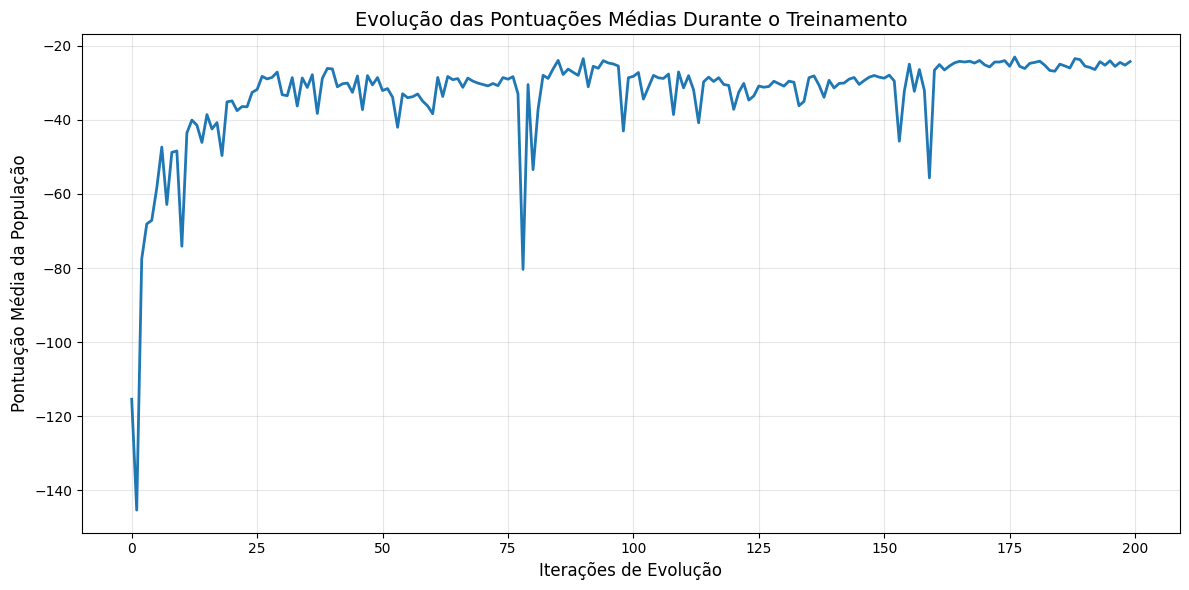

🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 5:33:53 │ ⏳ 00:00 │ 99.83step/s 


In [3]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("===== AgileRL Online Multi-Agent Demo =====")

    # Define the network configuration
    NET_CONFIG = {
        "latent_dim": 64,
        "encoder_config": {
            "hidden_size": [64],  # Actor hidden size
        },
        "head_config": {
            "hidden_size": [64],  # Critic hidden size
        },
    }
    

    # Define the initial hyperparameters
    INIT_HP = {
        "POPULATION_SIZE": 4,
        "ALGO": "MATD3",  # Algorithm
        "BATCH_SIZE": 256,  # Batch size
        "O_U_NOISE": True,  # Ornstein Uhlenbeck action noise
        "EXPL_NOISE": 0.05,  # Action noise scale
        "MEAN_NOISE": 0.0,  # Mean action noise
        "THETA": 0.15,  # Rate of mean reversion in OU noise
        "DT": 0.01,  # Timestep for OU noise
        "LR_ACTOR": 2.5e-4,  # Actor learning rate
        "LR_CRITIC": 2.5e-4,  # Critic learning rate
        "GAMMA": 0.98,  # Discount factor
        "MEMORY_SIZE": 100000,  # Max memory buffer size
        "LEARN_STEP": 25,  # Learning frequency
        "TAU": 0.005,  # For soft update of target parameters
        "POLICY_FREQ": 2,  # Policy frequency
    }

    num_envs = 8

    def make_env():
        return simple_speaker_listener_v4.parallel_env(continuous_actions=True)

    env = make_multi_agent_vect_envs(env=make_env, num_envs=num_envs)

    # Configure the multi-agent algo input arguments
    observation_spaces = [env.single_observation_space(agent) for agent in env.agents]
    action_spaces = [env.single_action_space(agent) for agent in env.agents]

    # Append number of agents and agent IDs to the initial hyperparameter dictionary
    INIT_HP["AGENT_IDS"] = env.agents


    # Mutation config for RL hyperparameters
    hp_config = HyperparameterConfig(
        lr_actor=RLParameter(min=1e-4, max=5e-4),
        lr_critic=RLParameter(min=1e-4, max=5e-4),
        batch_size=RLParameter(min=128, max=256, dtype=int),
        learn_step=RLParameter(
            min=25, max=50, dtype=int, grow_factor=1.5, shrink_factor=0.75
        ),
    )

    # Create a population ready for evolutionary hyper-parameter optimisation
    pop: list[MATD3] = create_population(
    algo=INIT_HP["ALGO"],
    net_config=NET_CONFIG,
    INIT_HP=INIT_HP,
    observation_space=observation_spaces,
    action_space=action_spaces,
    hp_config=hp_config,
    population_size=INIT_HP["POPULATION_SIZE"],
    num_envs=num_envs,
    device=device,
)

    # Configure the multi-agent replay buffer
    field_names = ["obs", "action", "reward", "next_obs", "done"]
    memory = MultiAgentReplayBuffer(
        INIT_HP["MEMORY_SIZE"],
        field_names=field_names,
        agent_ids=INIT_HP["AGENT_IDS"],
        device=device,
    )

    # Instantiate a tournament selection object (used for HPO)
    tournament = TournamentSelection(
        tournament_size=2,  # Tournament selection size
        elitism=True,  # Elitism in tournament selection
        population_size=INIT_HP["POPULATION_SIZE"],  # Population size
        eval_loop=5,  # Evaluate using last N fitness scores
    )


##########################################################################################


    # Estabelece os valores base de mutação (a serem diminuidos de acordo com o tempo)
    base_no_mutation   = 0.4 #
    base_architecture  = 0.05 #
    base_new_layer     = 0 #
    base_parameters    = 0.05 #
    base_rl_hp         = 0.05 # 
    base_mutation_sd   = 0.1 #

    # Instantiate a mutations object (used for HPO)
    mutations = Mutations(
        no_mutation=base_no_mutation,
        architecture=base_architecture,
        new_layer_prob=base_new_layer,
        parameters=base_parameters,
        activation=0,
        rl_hp=base_rl_hp,
        mutation_sd=base_mutation_sd,
        rand_seed=1,
        device=device,
    )

########################################################################################################

    # Define training loop parameters
    max_steps = 2_000_000  # Max steps (default: 2000000)
    learning_delay = 0  # Steps before starting learning
    evo_steps = 10_000  # Evolution frequency
    eval_steps = None  # Evaluation steps per episode - go until done
    eval_loop = 5  # Number of evaluation episodes
    elite = pop[0]  # Assign a placeholder "elite" agent
    total_steps = 0
    
    # Lista para armazenar pontuações médias para plotagem
    training_scores_history = []

    # TRAINING LOOP
    print("Training...")
    pbar = default_progress_bar(max_steps)



    while np.less([agent.steps[-1] for agent in pop], max_steps).all():
        pop_episode_scores = []
        for agent in pop:  # Loop through population
            agent.set_training_mode(True)
            obs, info = env.reset()  # Reset environment at start of episode
            scores = np.zeros(num_envs)
            completed_episode_scores = []
            steps = 0
            for idx_step in range(evo_steps // num_envs):
                action, raw_action = agent.get_action(
                    obs=obs, infos=info
                )  # Predict action
                next_obs, reward, termination, truncation, info = env.step(
                    action
                )  # Act in environment

                scores += np.sum(np.array(list(reward.values())).transpose(), axis=-1)
                total_steps += num_envs
                steps += num_envs

                # Save experiences to replay buffer
                memory.save_to_memory(
                    obs,
                    raw_action,
                    reward,
                    next_obs,
                    termination,
                    is_vectorised=True,
                )

                # Learn according to learning frequency
                # Handle learn steps > num_envs
                if agent.learn_step > num_envs:
                    learn_step = agent.learn_step // num_envs
                    if (
                        idx_step % learn_step == 0
                        and len(memory) >= agent.batch_size
                        and memory.counter > learning_delay
                    ):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                # Handle num_envs > learn step; learn multiple times per step in env
                elif (
                    len(memory) >= agent.batch_size and memory.counter > learning_delay
                ):
                    for _ in range(num_envs // agent.learn_step):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                obs = next_obs

                # Calculate scores and reset noise for finished episodes
                reset_noise_indices = []
                term_array = np.array(list(termination.values())).transpose()
                trunc_array = np.array(list(truncation.values())).transpose()
                for idx, (d, t) in enumerate(zip(term_array, trunc_array)):
                    if np.any(d) or np.any(t):
                        completed_episode_scores.append(scores[idx])
                        agent.scores.append(scores[idx])
                        scores[idx] = 0
                        reset_noise_indices.append(idx)

                agent.reset_action_noise(reset_noise_indices)

            pbar.update(evo_steps // len(pop))

            agent.steps[-1] += steps
            pop_episode_scores.append(completed_episode_scores)

        # Evaluate population
        fitnesses = [
            agent.test(
                env,
                max_steps=eval_steps,
                loop=eval_loop,
            )
            for agent in pop
        ]
        mean_scores = [
            (
                np.mean(episode_scores)
                if len(episode_scores) > 0
                else 0
            )
            for episode_scores in pop_episode_scores
        ]
        
        # Salvar pontuação média da população para plotagem
        population_mean_score = np.mean([score for score in mean_scores if isinstance(score, (int, float))])
        training_scores_history.append(population_mean_score)

        mean_scores_display = [
            (
                score if isinstance(score, (int, float))
                else "0 completed episodes"
            )
            for score in mean_scores
        ]

        pbar.write(
            f"--- Global steps {total_steps} ---\n"
            f"Steps {[agent.steps[-1] for agent in pop]}\n"
            f"Scores: {mean_scores_display}\n"
            f"Fitnesses: {['%.2f' % fitness for fitness in fitnesses]}\n"
            f"5 fitness avgs: {['%.2f' % np.mean(agent.fitness[-5:]) for agent in pop]}\n"
            f"Mutations: {[agent.mut for agent in pop]}"
        )

        ######################################################################################################
        

        # Cria a variavel progress
        agent_steps = [a.steps[-1] for a in pop]
        progress = max(agent_steps) / max_steps
        progress = min(max(progress, 0), 1)

        # Separa o treinamento em três: 
        
        if progress < 0.4:
            # Cria a variavel de decaimento 
            decay_factor = 1 - 0.9 * progress

            mutations.architecture   = base_architecture * decay_factor
            mutations.parameters     = base_parameters * decay_factor
            mutations.rl_hp          = base_rl_hp * decay_factor
            mutations.mutation_sd    = base_mutation_sd * decay_factor
            mutations.no_mutation    = base_no_mutation + (1 - base_no_mutation) * progress

            # Tournament selection and population mutation
            elite, pop = tournament.select(pop)
            pop = mutations.mutation(pop)
        
        elif progress <0.8: 
            # Cria a variavel de decaimento 
            decay_factor = 1 - 0.9 * progress

            mutations.architecture   = base_architecture * decay_factor
            mutations.parameters     = base_parameters * decay_factor
            mutations.rl_hp          = base_rl_hp * decay_factor
            mutations.mutation_sd    = base_mutation_sd * decay_factor
            mutations.no_mutation    = base_no_mutation + (1 - base_no_mutation) * progress
            
            # Faz a seleção 
            elite, pop = tournament.select(pop)

            # Separa o melhor agente dos outros  
            others = pop[1:]                  

            # Faz a mutação apenas nos outros
            mutated_others = mutations.mutation(others)

            # Junta eles
            pop = [elite] + mutated_others

        # Para totalmente a mutação e diminui o Learning Rate de actor e critic
        else: 

            # Loop para atualizar lr_actor e lr_critic para os agentes            
            for agent in pop:
                
                # Define o novo lr do actor
                old_actor_lr = agent.lr_actor
                new_actor_lr = max(old_actor_lr * 0.9, 1e-6)
                agent.lr_actor = new_actor_lr

                # Define o novo lr do critic
                old_critic_lr = agent.lr_critic
                new_critic_lr = max(old_critic_lr * 0.9, 1e-6)
                agent.lr_critic = new_critic_lr

                # Atualiza os learning rates
                agent.reinit_optimizers()

            elite, pop = tournament.select(pop)


##################################################################################################################
        # Update step counter
        for agent in pop:
            agent.steps.append(agent.steps[-1])

    # Save the trained algorithm
    path = "./models/MATD3"
    filename = "MATD3_trained_agent.pt"
    os.makedirs(path, exist_ok=True)
    save_path = os.path.join(path, filename)
    elite.save_checkpoint(save_path)
    
    # Plotar e salvar a evolução das pontuações
    plt.figure(figsize=(12, 6))
    plt.plot(training_scores_history, linewidth=2)
    plt.title('Evolução das Pontuações Médias Durante o Treinamento', fontsize=14)
    plt.xlabel('Iterações de Evolução', fontsize=12)
    plt.ylabel('Pontuação Média da População', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plot_path = os.path.join(path, "training_scores_evolution.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico de evolução das pontuações salvo em: {plot_path}")
    
    # Salvar dados das pontuações em arquivo numpy
    scores_data_path = os.path.join(path, "training_scores_history.npy")
    np.save(scores_data_path, np.array(training_scores_history))
    print(f"Dados das pontuações salvos em: {scores_data_path}")
    
    plt.show()

    pbar.close()
    env.close()
